In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from shapely.geometry.polygon import LinearRing
import cmocean
import scipy

# Figure 1

In [2]:
data_availability = xr.open_dataset('data/data_availability.nc')

In [3]:
date_ticks=pd.date_range('2002', '2020-12-01', freq='AS-JAN')

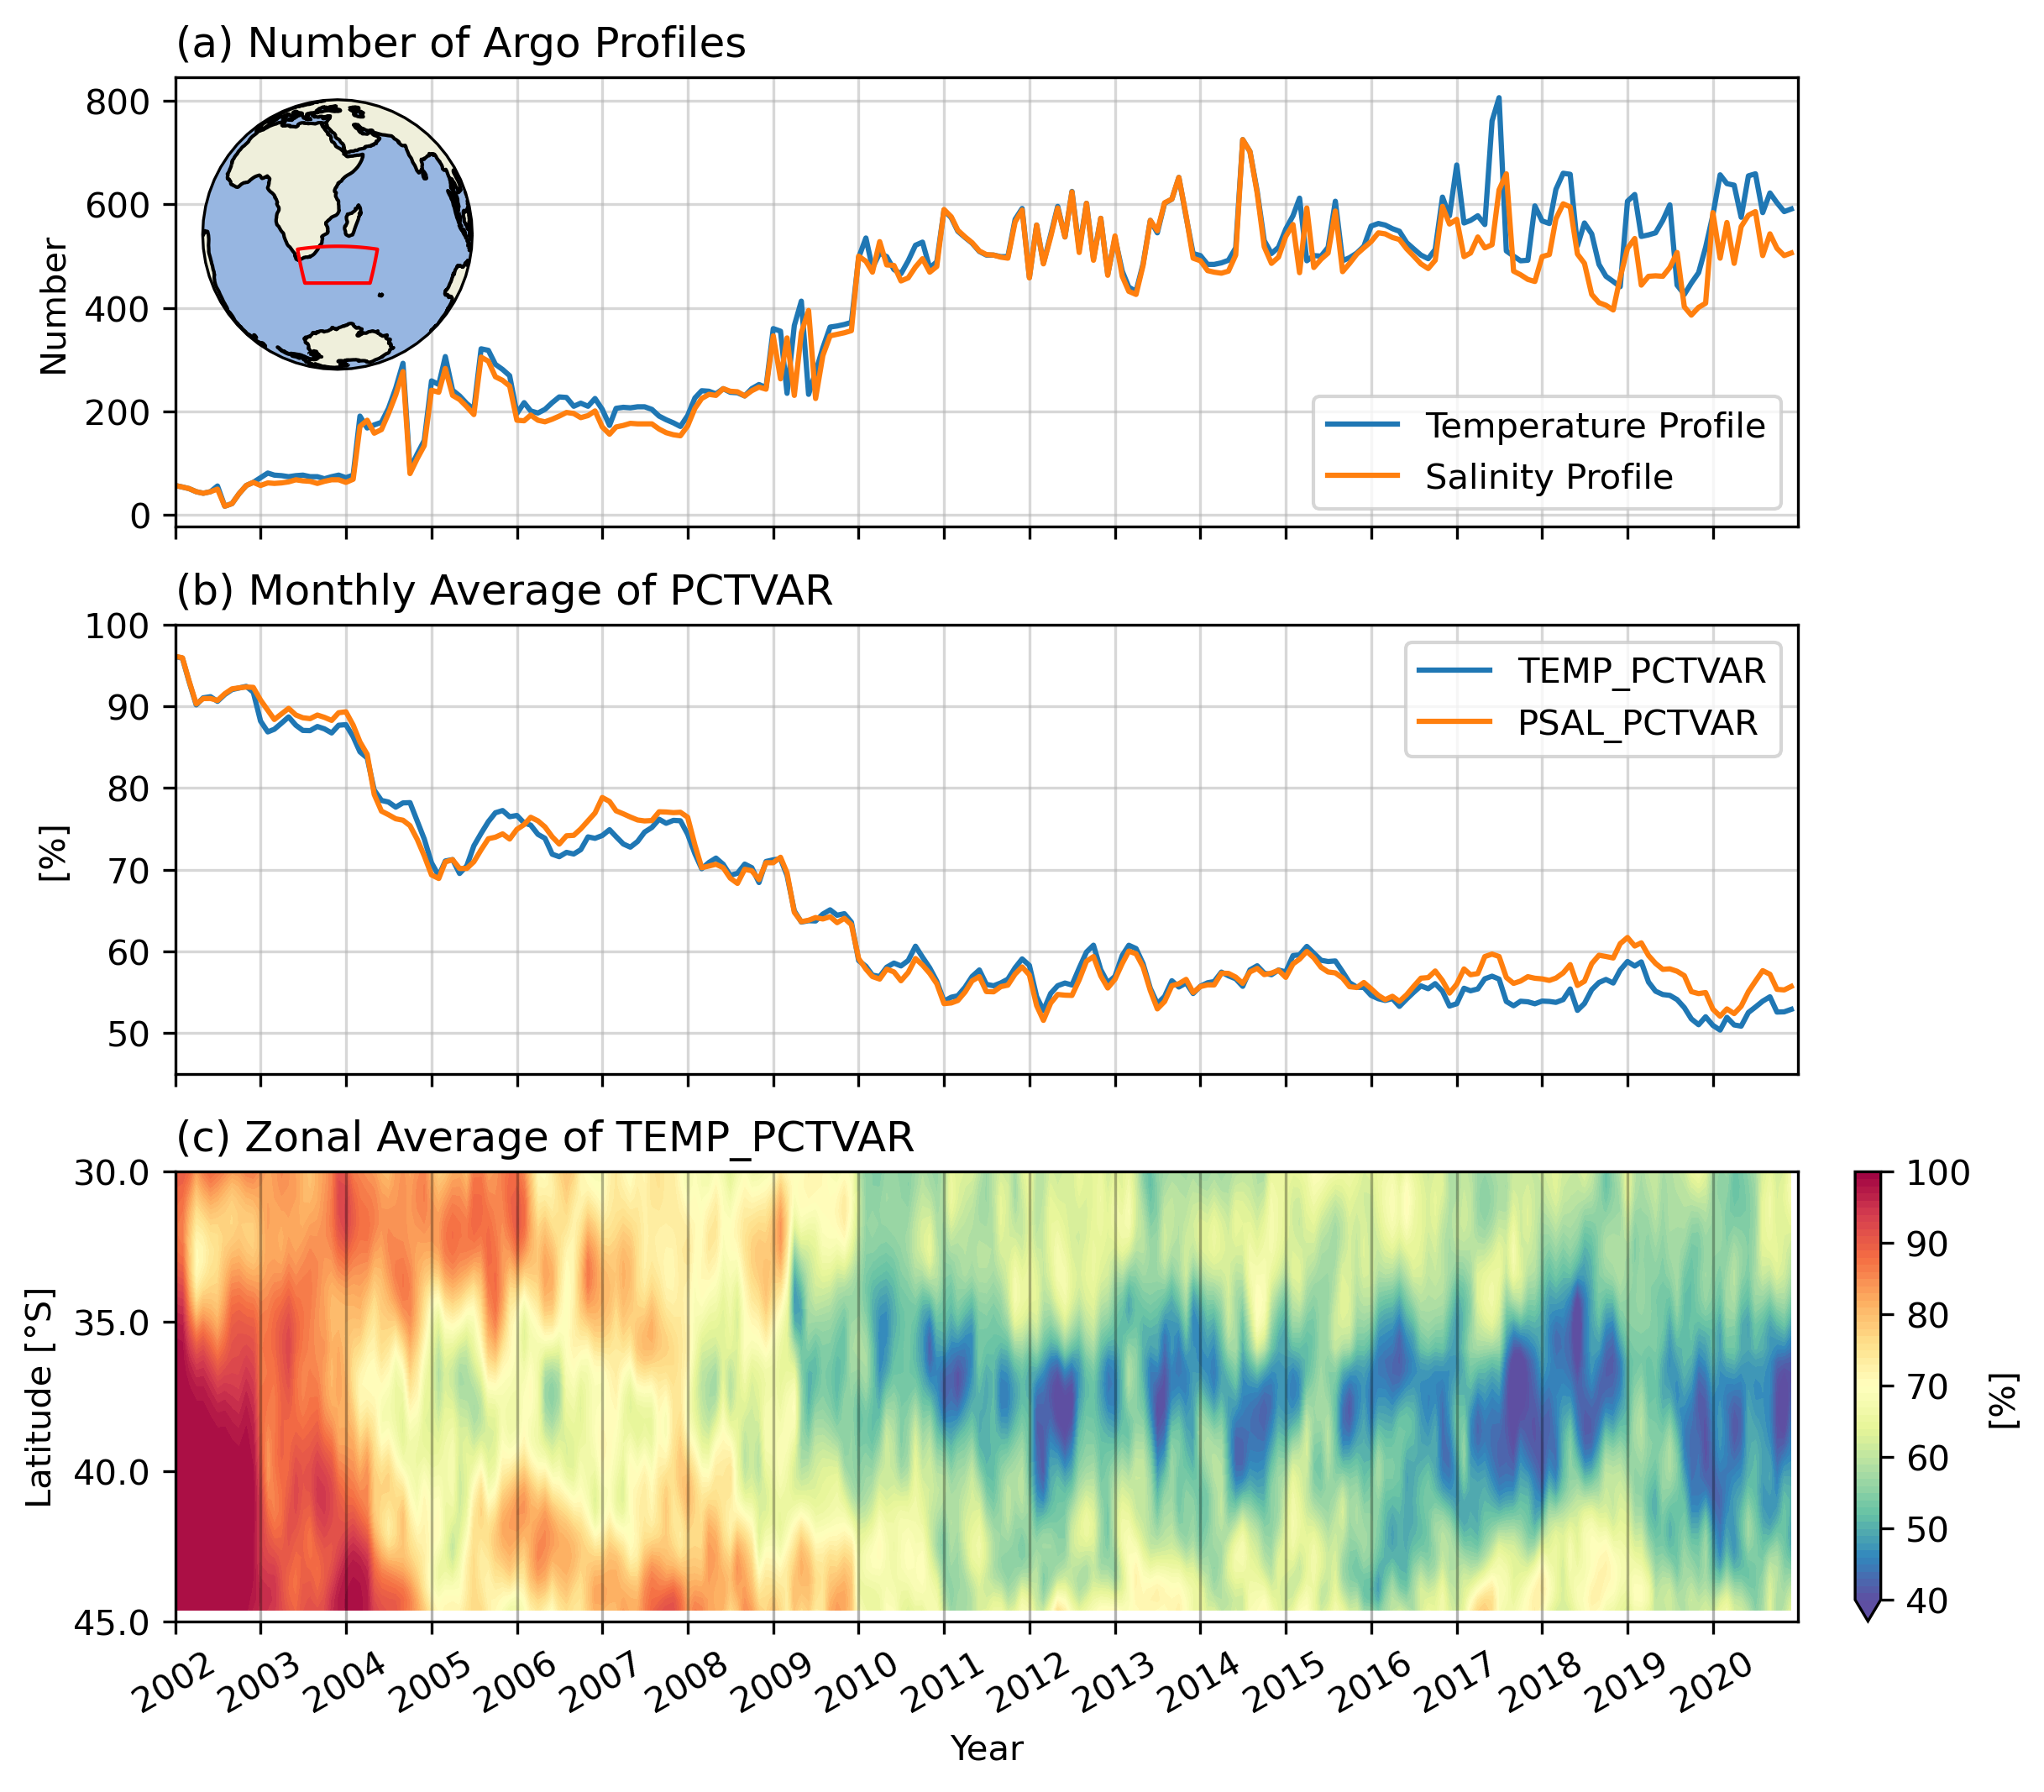

In [4]:
fig, axes = plt.subplots(dpi=300, figsize=[8,7], nrows=3, constrained_layout=True, sharex=True)

# first fig
axes[0].plot(data_availability.time,
      data_availability.temp_profiles, 
       label='Temperature Profile')
axes[0].plot(data_availability.time,
      data_availability.sal_profiles, 
       label='Salinity Profile')

axes[0].set_xticks(date_ticks)
axes[0].set_xticklabels([str(i)[:4] for i in date_ticks])
axes[0].set_ylabel('Number')
axes[0].legend(loc='lower right')
axes[0].set_title('(a) Number of Argo Profiles', loc='left')
axes[0].grid(alpha=0.5)

# second fig
axes[1].plot(data_availability.time,
       data_availability.pctvar_temp, label='TEMP_PCTVAR')
axes[1].plot(data_availability.time,
       data_availability.pctvar_sal, label='PSAL_PCTVAR')

axes[1].set_xticks(date_ticks)
axes[1].set_xticklabels([str(i)[:4] for i in date_ticks])
axes[1].grid(alpha=0.5)
axes[1].set_xlim(pd.Timestamp('2002-01-01'),
           pd.Timestamp('2020-12-31'))
axes[1].legend()
axes[1].set_title('(b) Monthly Average of PCTVAR', loc='left')
axes[1].set_ylabel('[%]')
axes[1].set_ylim(45,100)

# third fig
im = axes[2].contourf(data_availability.time,
                 data_availability.lat,
                 data_availability.pctvar_temp_zonal, 
                 levels=np.arange(40,100.0001,1), extend='min', cmap='Spectral_r')

fig.colorbar(im, ticks=np.arange(40,101,10), pad=0.02, label='[%]')
axes[2].set_yticks(np.arange(-45,-29.5,5))
axes[2].set_yticklabels([i*-1 for i in np.arange(-45,-29.5,5)])
axes[2].set_ylabel('Latitude [°S]')
axes[2].set_xlabel('Year')
axes[2].set_xticks(pd.date_range('2002','2020',freq='AS'))
axes[2].set_xticklabels([str(i)[:4] for i in pd.date_range('2002','2020',freq='AS')])

axes[2].set_title('(c) Zonal Average of TEMP_PCTVAR', loc='left')
axes[2].grid(alpha=0.3, c='k', axis='x')
plt.xticks(rotation=30)

# inset
extent = [20, 60, -45, -30]
lonmin, lonmax, latmin, latmax = extent

inset_x = 1
inset_y = 1
inset_size = 0.6

ax2 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
    central_latitude=-25,
    central_longitude=40))
ax2.set_global()
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)

ip = InsetPosition(axes[0], [-0.20,0.35,
                        inset_size,
                        inset_size])
ax2.set_axes_locator(ip)

nvert = 100
lons = np.r_[np.linspace(lonmin, lonmin, nvert),
             np.linspace(lonmin, lonmax, nvert),
             np.linspace(lonmax, lonmax, nvert)].tolist()
lats = np.r_[np.linspace(latmin, latmax, nvert),
             np.linspace(latmax, latmax, nvert),
             np.linspace(latmax, latmin, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax2.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=1);

# Figure 2

In [5]:
sep_clim = xr.open_dataset('data/sep_clim.nc')

Zonal sections 1 and 2:

In [6]:
# section 1
lat_sec1 = -37
lon_sec1 = [37,50]
section1_dens = sep_clim.sigma0.sel(lat=lat_sec1, method='nearest').sel(lon=slice(lon_sec1[0],
                                                                                  lon_sec1[1]), 
                                                                        depth=slice(0,500))

section1_mld = sep_clim.mld.sel(lat=lat_sec1, 
                            method='nearest').sel(lon=slice(lon_sec1[0],
                                                            lon_sec1[1]))

section1_temp = sep_clim.sel(lat=lat_sec1, method='nearest').sel(lon=slice(lon_sec1[0],
                                                                           lon_sec1[1]), 
                                                                 depth=slice(0,500)).temp

In [7]:
# section 2
lat_sec2 = -39
lon_sec2 = [50,63]
section2_dens = sep_clim.sigma0.sel(lat=lat_sec2, method='nearest').sel(lon=slice(lon_sec2[0],
                                                                                  lon_sec2[1]), 
                                                                        depth=slice(0,500))

section2_mld = sep_clim.mld.sel(lat=lat_sec2, 
                                method='nearest').sel(lon=slice(lon_sec2[0],
                                                                lon_sec2[1]))

section2_temp = sep_clim.temp.sel(lat=lat_sec2, 
                                  method='nearest').sel(lon=slice(lon_sec2[0],
                                                                  lon_sec2[1]))

The plot:

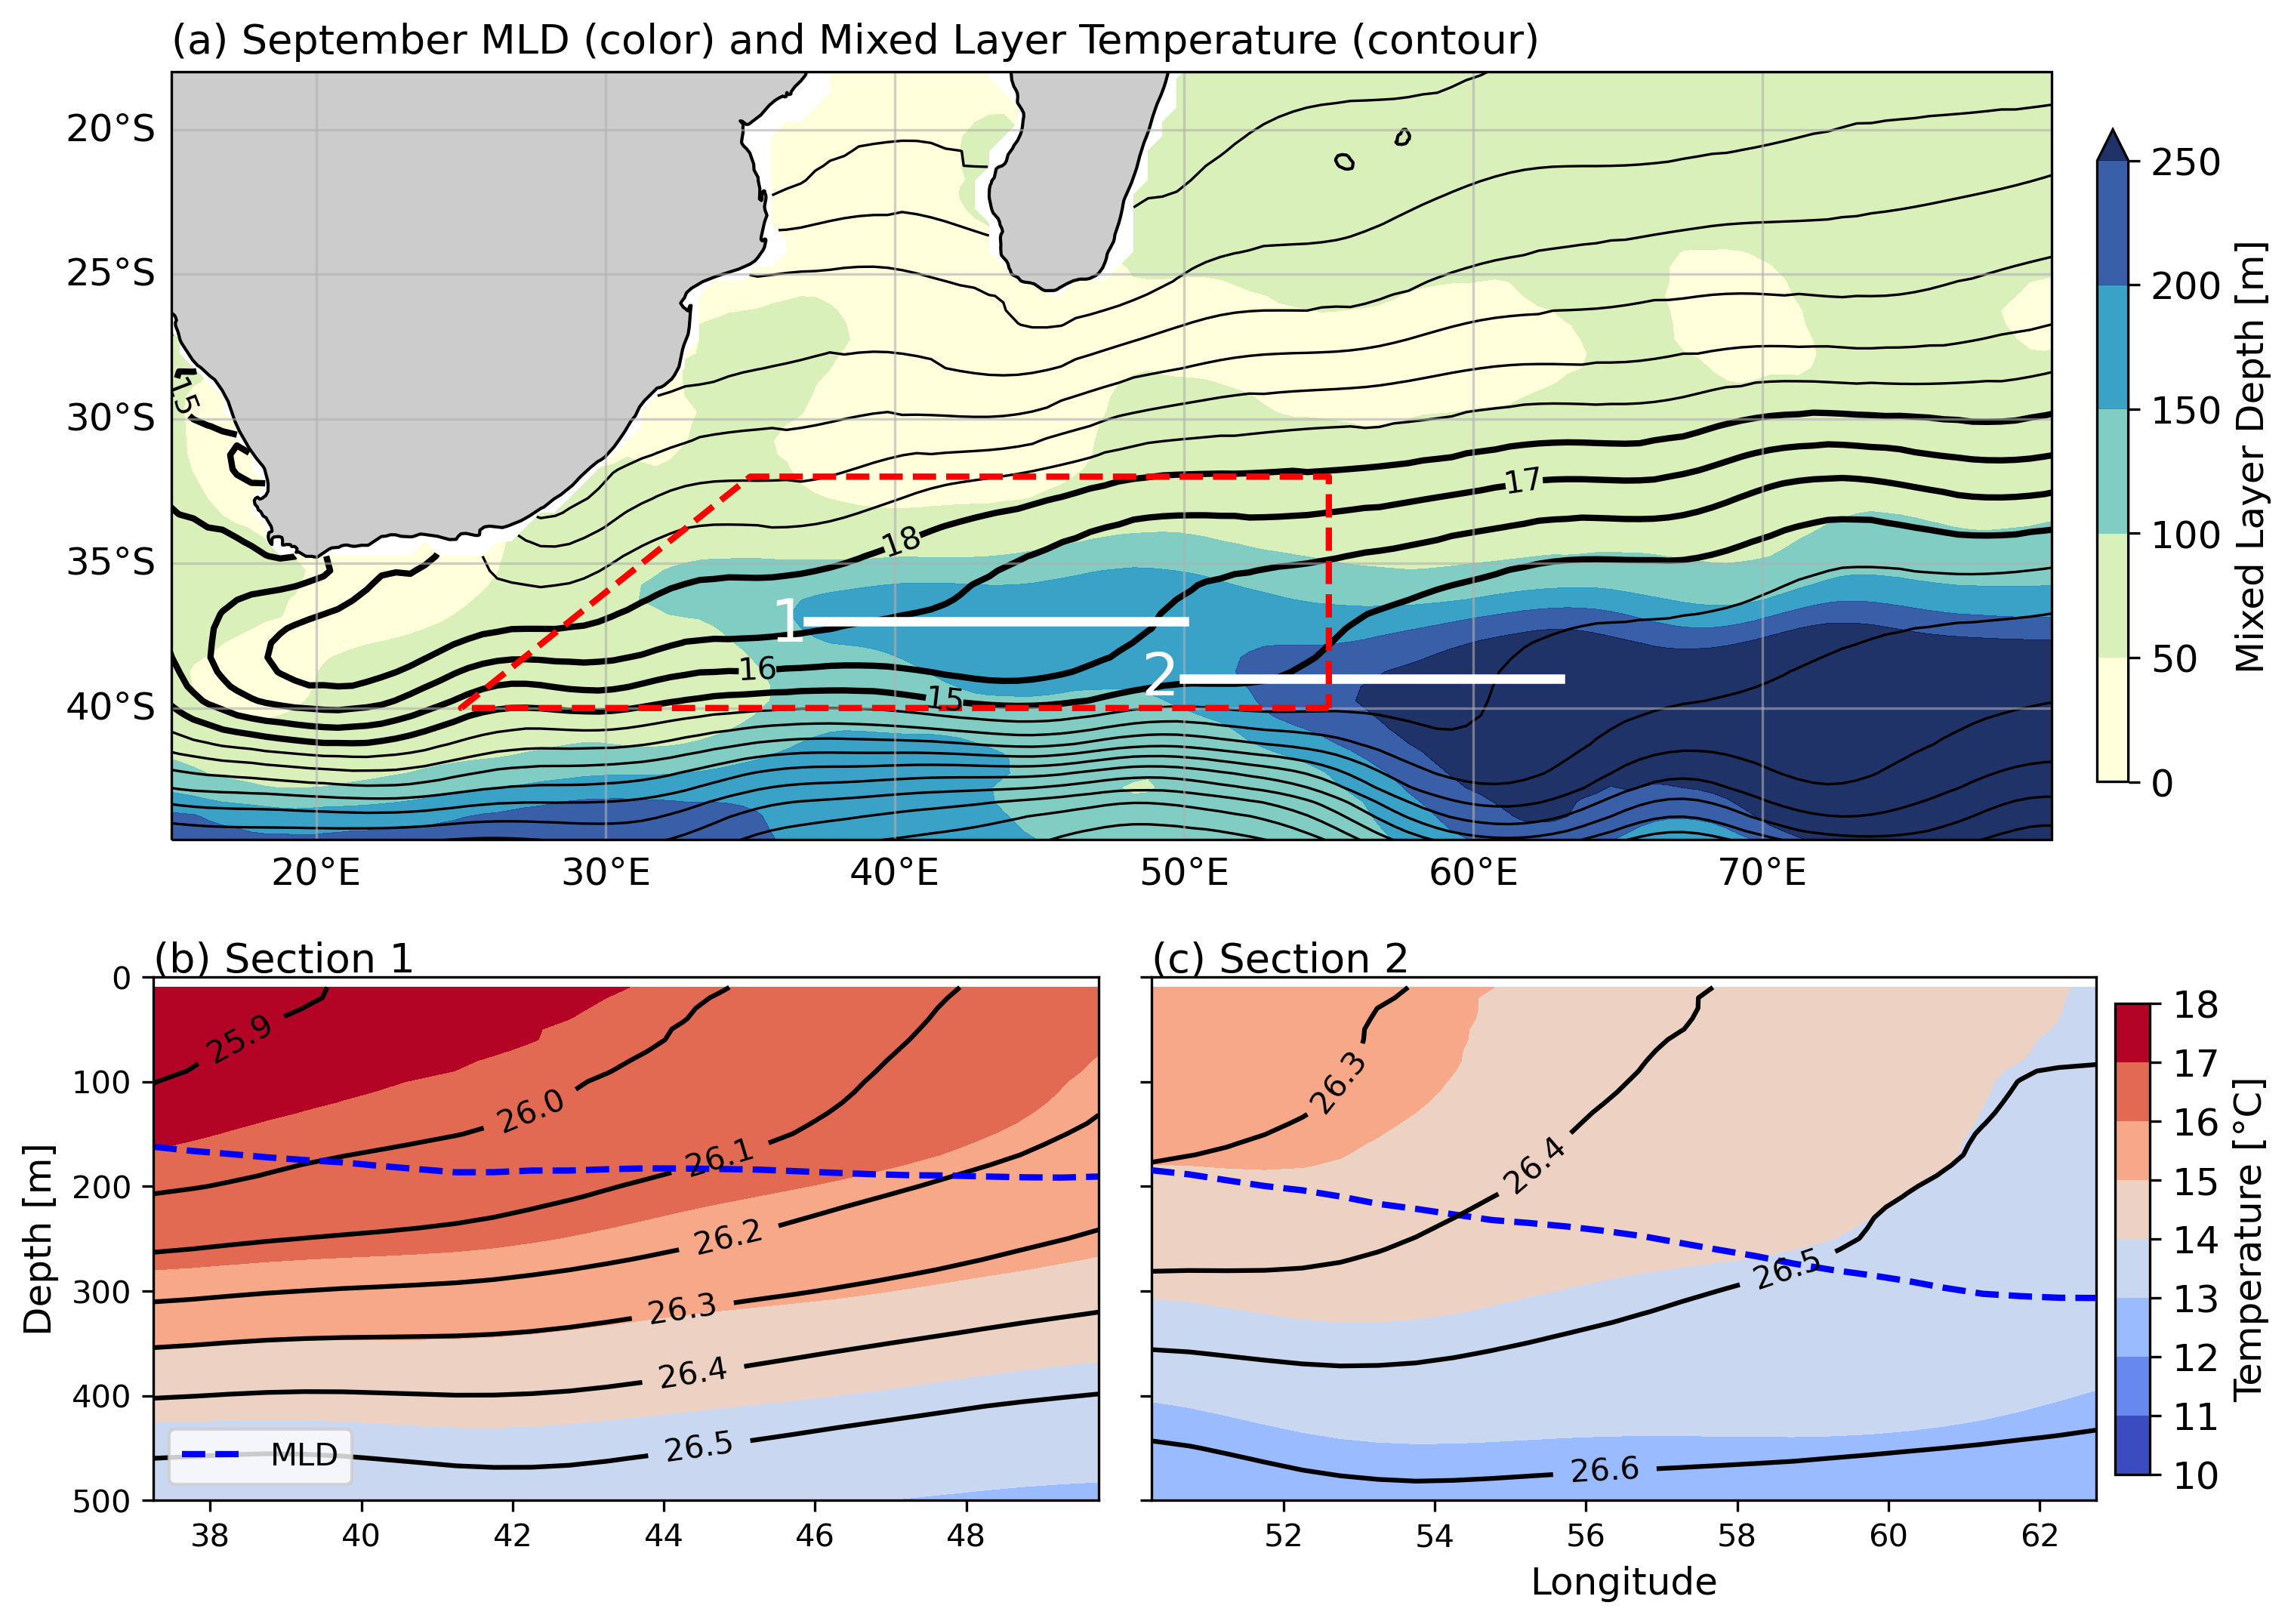

In [8]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,3), dpi=300, 
                                  ncols=2, sharey=True, constrained_layout=True)
colormap='coolwarm'

# section 1
section1_dens.plot.contour(yincrease=False, 
                           y='depth', 
                           colors='k',
                           levels=np.arange(25,28, 0.1),
                           ax=ax1).clabel(fontsize=10, 
                                          colors='black', 
                                          inline=1, 
                                          inline_spacing=8,
                                          fmt="%.1f", 
                                          rightside_up=True, 
                                          use_clabeltext=True)

section1_mld.plot(color='b', ax=ax1, 
                  ls='--', 
                  lw=2, label='MLD')

im=section1_temp.plot.contourf(ax=ax1,yincrease=False,  
                               y='depth',
                               cmap=colormap,
                               add_colorbar=False,
                               levels=np.arange(10,19,1),
                               extend='neither')

# section 2
section2_dens.plot.contour(yincrease=False, 
                           y='depth', 
                           colors='k',
                           levels=np.arange(25,28, 0.1), 
                           ax=ax2,
                           zorder=10).clabel(fontsize=10, 
                                            colors='black', 
                                            inline=1, 
                                            inline_spacing=8,
                                            fmt="%.1f", 
                                            rightside_up=True, 
                                            use_clabeltext=True)
section2_mld.plot(color='b', 
                  ax=ax2, 
                 ls='--', 
                 lw=2,
                 zorder=5)

section2_temp.plot.contourf(yincrease=False,
                           y='depth',
                           cmap=colormap,
                           levels=np.arange(10,19,1),
                           ax=ax2,
                           add_colorbar=False,
                           extend='neither')


# ax 1
ax1.set_ylim(500,0)
ax1.set_ylabel('Depth [m]', fontsize=12)
ax1.set_xlabel('')
ax1.set_title('')
ax1.legend(loc=3)
ax1.annotate(text='(b) Section 1', xy=[0,168], xycoords='axes points', fontsize=13)

# ax 2
ax2.set_ylabel('')
ax2.set_xlabel('Longitude', size=12)
ax2.set_title('')
ax2.annotate(text='(c) Section 2', xy=[0,168], xycoords='axes points', fontsize=13)

# others
cbar=fig.colorbar(im, shrink=0.9, 
             aspect=45, pad=0.0)
cbar.set_label('Temperature [°C]', fontsize=12)
cbar.ax.tick_params(labelsize=12)

# new axis for the horizontal MLD map
ax = fig.add_axes([0.07,1.1,1,1.2], projection=ccrs.PlateCarree())

extent = [15, 80, -40, -18]
ax.coastlines()
ax.set_extent(extent)
gl=ax.gridlines(draw_labels=True, alpha=0.6)
gl.top_labels=False
gl.right_labels=False
gl.xlocator = mticker.FixedLocator(np.arange(10,95,10))
gl.ylocator = mticker.FixedLocator(np.arange(-10,-60,-5))
gl.ylabel_style = {'size':12}
gl.xlabel_style = {'size':12}
ax.add_feature(cfeature.LAND, facecolor='0.8')

im2=sep_clim.mld.plot.contourf(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    levels=np.arange(0,276,50),
                                    cmap='YlGnBu', alpha=0.9, add_colorbar=False)

sep_clim.ml_temp.plot.contour(ax=ax,
                                 transform=ccrs.PlateCarree(),
                                 levels=[15,16,17,18],
                                 colors='k', 
                                 linestyles='-',
                                 linewidths=2).clabel(fmt='%.f')
sep_clim.ml_temp.plot.contour(ax=ax,
                                 transform=ccrs.PlateCarree(),
                                 levels=np.arange(0,15),
                                 colors='k', 
                                 linestyles='-',
                                 linewidths=0.8)
sep_clim.ml_temp.plot.contour(ax=ax,
                                 transform=ccrs.PlateCarree(),
                                 levels=np.arange(19,35),
                                 colors='k', 
                                 linestyles='-',
                                 linewidths=0.8)

cbar2 = fig.colorbar(im2, pad=0.02, shrink=0.8)
cbar2.set_label('Mixed Layer Depth [m]', fontsize=12)
cbar2.ax.tick_params(labelsize=12)
ax.set_title('')

plt.plot([37,50],[-37,-37], linewidth=3, linestyle='-', transform=ccrs.PlateCarree(), c='w')
plt.plot([50,63],[-39,-39], linewidth=3, linestyle='-', transform=ccrs.PlateCarree(), c='w')
plt.plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='r',
         linestyle='--', linewidth=2)

ax.annotate(text='(a) September MLD (color) and Mixed Layer Temperature (contour)', 
            xy=[0,250], xycoords='axes points', fontsize=13)

ax.annotate(text='1', 
            xy=[190,63], xycoords='axes points', fontsize=19, c='w')

ax.annotate(text='2', 
            xy=[308,46], xycoords='axes points', fontsize=19, c='w');

# Figure 3

In [9]:
da = xr.open_dataset('data/float_1901377.nc')

In [10]:
lower_bound_depth=1e3

def_1 = da.where(da.pv<2).where(da.pres>da.mld).where(da.pres<lower_bound_depth).where(
    da.pot_temp>=15).where(da.pot_temp<=18) 
def_2 = da.where(da.pv<1.5).where(da.pres>da.mld).where(da.pres<lower_bound_depth).where(
    da.pot_temp>=15).where(da.pot_temp<=18) 
def_3 = da.where(da.dtemp_dz<1.5).where(da.pres>da.mld).where(da.pres<lower_bound_depth).where(
    da.pot_temp>=15).where(da.pot_temp<=18) 
def_4 = da.where(da.dtemp_dz<1).where(da.pres>da.mld).where(da.pres<lower_bound_depth).where(
    da.pot_temp>=15).where(da.pot_temp<=18) 
def_5 = da.where(da.dtemp_dz<1).where(da.pres>da.mld).where(da.pres<lower_bound_depth).where(
    da.pot_temp>=16).where(da.pot_temp<=18) 

Text(0.5, 1.0, '${dT/dz}$')

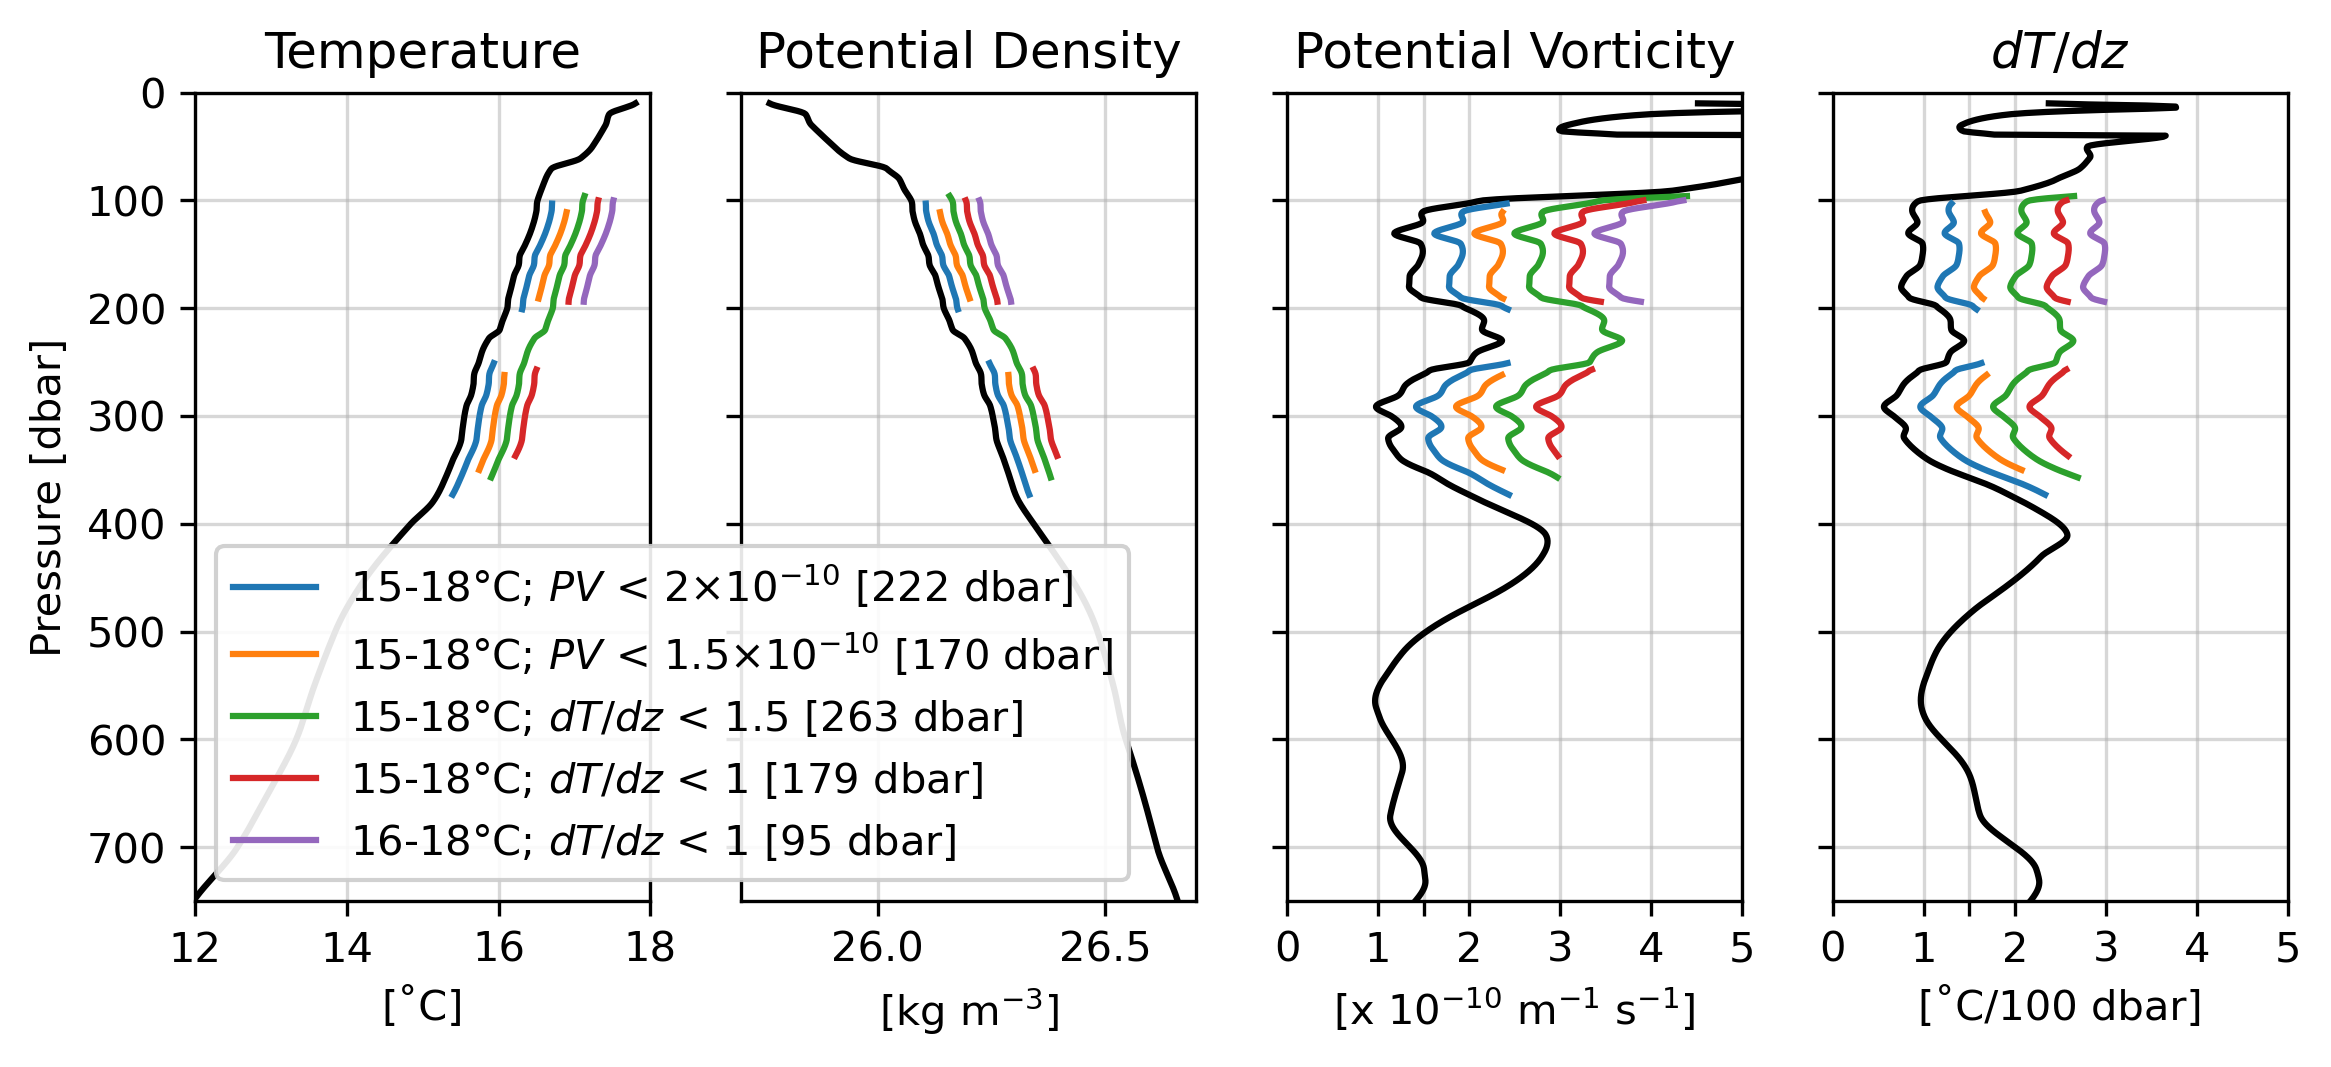

In [11]:
fig, axes = plt.subplots(dpi=300, figsize=[9,3.5], ncols=4)
max_depth=750

# Potential Temperature plot
ax_index = 0
da.pot_temp.plot(y='pres', yincrease=False, ax=axes[ax_index], c='k')
gap=0.2
(def_1.pot_temp+gap).plot(y='pres', yincrease=False, ax=axes[ax_index], label='15-18°C; ${PV}$ < 2×10$^{-10}$ [222 dbar]')
(def_2.pot_temp+gap*2).plot(y='pres', yincrease=False, ax=axes[ax_index], label='15-18°C; ${PV}$ < 1.5×10$^{-10}$ [170 dbar]')
(def_3.pot_temp+gap*3).plot(y='pres', yincrease=False, ax=axes[ax_index], label='15-18°C; ${dT/dz}$ < 1.5 [263 dbar]')
(def_4.pot_temp+gap*4).plot(y='pres', yincrease=False, ax=axes[ax_index], label='15-18°C; ${dT/dz}$ < 1 [179 dbar]')
(def_5.pot_temp+gap*5).plot(y='pres', yincrease=False, ax=axes[ax_index], label='16-18°C; ${dT/dz}$ < 1 [95 dbar]')
axes[ax_index].tick_params(colors='k', axis='x')
axes[ax_index].set_xlabel('[˚C]', color='k')
axes[ax_index].set_ylim(max_depth,0)
axes[ax_index].set_xlim(12,18)
axes[ax_index].set_zorder(1)
axes[ax_index].legend(facecolor='white', framealpha=0.9)
axes[ax_index].set_ylabel('Pressure [dbar]')
axes[ax_index].grid(alpha=0.5)
axes[ax_index].set_title('Temperature')

# Potential Density plot
ax_index = 1
gap=0.03
da.sigma0.plot(y='pres', yincrease=False, ax=axes[ax_index], c='k')
(def_1.sigma0+gap).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_2.sigma0+gap*2).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_3.sigma0+gap*3).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_4.sigma0+gap*4).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_5.sigma0+gap*5).plot(y='pres', yincrease=False, ax=axes[ax_index])
axes[ax_index].tick_params(colors='k', axis='x')
axes[ax_index].set_xlabel('[kg m$^{-3}$]', color='k')
axes[ax_index].set_ylim(max_depth,0)
axes[ax_index].set_xlim(25.7,26.7)
axes[ax_index].set_zorder(0)
axes[ax_index].set_ylabel('')
axes[ax_index].grid(alpha=0.5)
axes[ax_index].set_yticklabels('')
axes[ax_index].set_title('Potential Density')

# Potential Vorticity plot
ax_index = 2
gap=0.44
da.pv.plot(y='pres', yincrease=False, ax=axes[ax_index], c='k')
(def_1.pv+gap).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_2.pv+gap*2).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_3.pv+gap*3).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_4.pv+gap*4).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_5.pv+gap*5).plot(y='pres', yincrease=False, ax=axes[ax_index])
axes[ax_index].tick_params(colors='k', axis='x')
axes[ax_index].set_xlabel('[x 10$^{-10}$ m$^{-1}$ s$^{-1}$]', color='k')
axes[ax_index].set_ylim(max_depth,0)
axes[ax_index].set_xticks([0,1,1.5,2,3,4,5])
axes[ax_index].set_xticklabels(['0','1','','2','3','4','5'])
axes[ax_index].set_xlim(0,5)
axes[ax_index].set_ylabel('')
axes[ax_index].grid(alpha=0.5)
axes[ax_index].set_yticklabels('')
axes[ax_index].set_title('Potential Vorticity')

# dT/dz plot
ax_index = 3
gap=0.4
da.dtemp_dz.plot(y='pres', yincrease=False, ax=axes[ax_index], c='k')
(def_1.dtemp_dz+gap).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_2.dtemp_dz+gap*2).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_3.dtemp_dz+gap*3).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_4.dtemp_dz+gap*4).plot(y='pres', yincrease=False, ax=axes[ax_index])
(def_5.dtemp_dz+gap*5).plot(y='pres', yincrease=False, ax=axes[ax_index])
axes[ax_index].tick_params(colors='k', axis='x')
axes[ax_index].set_xlabel('[˚C/100 dbar]', color='k')
axes[ax_index].set_xticks([0,1,1.5,2,3,4,5])
axes[ax_index].set_xticklabels(['0','1','','2','3','4','5'])
axes[ax_index].set_ylim(max_depth,0)
axes[ax_index].set_xlim(0,5)
axes[ax_index].grid(alpha=0.5)
axes[ax_index].set_yticklabels('')
axes[ax_index].set_ylabel('')
axes[ax_index].set_title('${dT/dz}$')

# Figure 4

In [12]:
thickness_qnet_n2 = xr.open_dataset('data/thickness_qnet_n2.nc')

In [13]:
# calculate the correlation coefficients

# thickness and winter hf
Rhf1,phf1 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_1, thickness_qnet_n2.winter_qnet)
Rhf2,phf2 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_2, thickness_qnet_n2.winter_qnet)
Rhf3,phf3 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_3, thickness_qnet_n2.winter_qnet)
Rhf4,phf4 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_4, thickness_qnet_n2.winter_qnet)

# thickness and summer n2
Rn1,pn1 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_1, thickness_qnet_n2.summer_n2)
Rn2,pn2 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_2, thickness_qnet_n2.summer_n2)
Rn3,pn3 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_3, thickness_qnet_n2.summer_n2)
Rn4,pn4 = scipy.stats.pearsonr(thickness_qnet_n2.thick_anom_4, thickness_qnet_n2.summer_n2)

In [ ]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

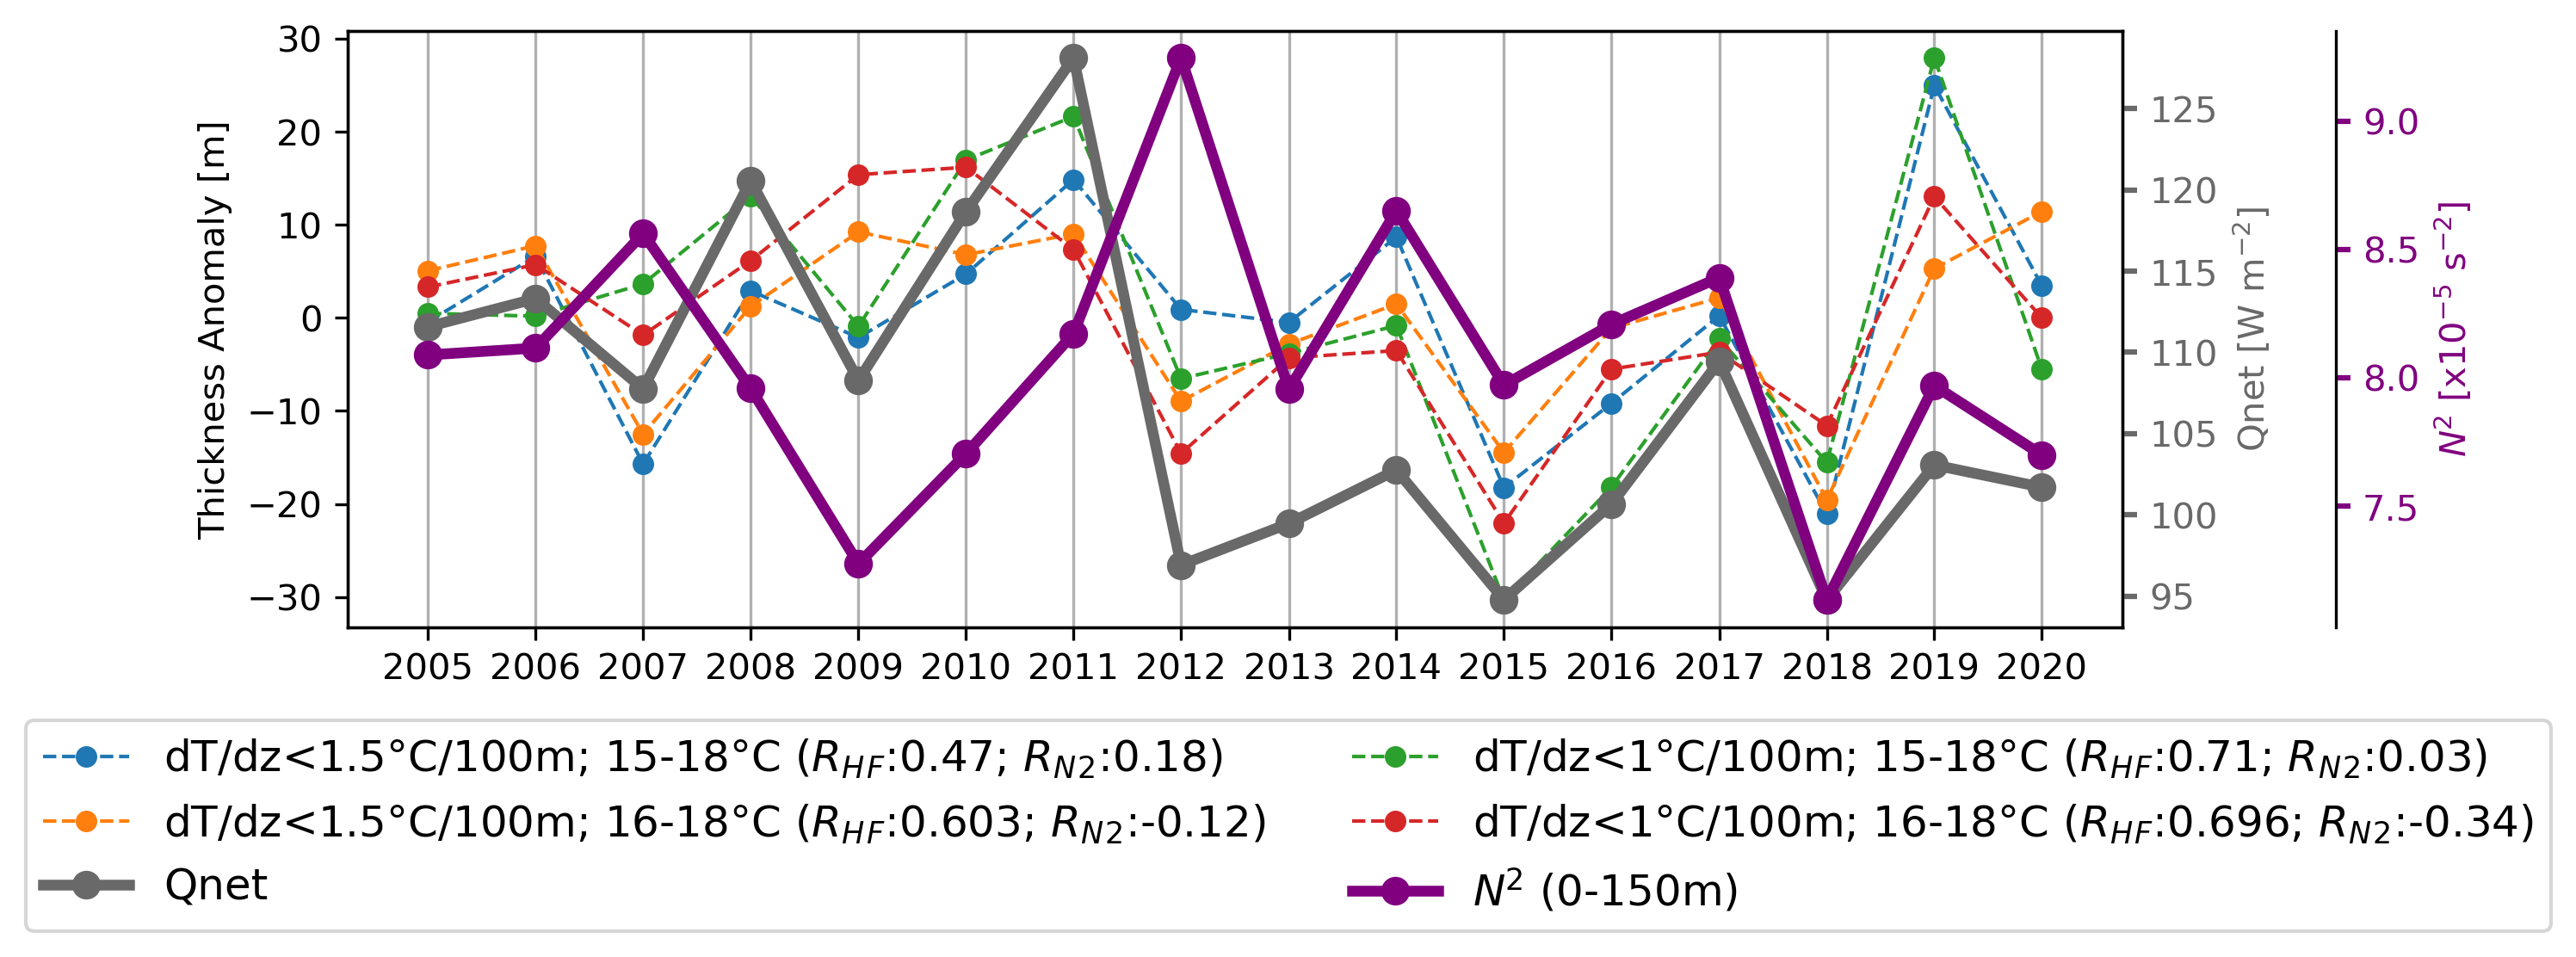

In [14]:
fig, host = plt.subplots(figsize=[11,3], dpi=300)
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.12))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.

make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

lw_thickness=1
p1 = host.plot(thickness_qnet_n2.time, thickness_qnet_n2.thick_anom_1, 'tab:blue', marker='o', markersize=5, lw=lw_thickness, 
               label=f'dT/dz<1.5°C/100m; 15-18°C ($\itR$$_H$$_F$:{Rhf1:.2}; $\itR$$_N$$_2$:{Rn1:.2})', ls='--')
p2 = host.plot(thickness_qnet_n2.time, thickness_qnet_n2.thick_anom_2, 'tab:orange', marker='o', markersize=5, lw=lw_thickness, 
               label=f'dT/dz<1.5°C/100m; 16-18°C ($\itR$$_H$$_F$:{Rhf2:.3}; $\itR$$_N$$_2$:{Rn2:.2})', ls='--')
p3 = host.plot(thickness_qnet_n2.time, thickness_qnet_n2.thick_anom_3, 'tab:green', marker='o', markersize=5, lw=lw_thickness, 
               label=f'dT/dz<1°C/100m; 15-18°C ($\itR$$_H$$_F$:{Rhf3:.2}; $\itR$$_N$$_2$:{Rn3:.1})', ls='--')
p4 = host.plot(thickness_qnet_n2.time, thickness_qnet_n2.thick_anom_4, 'tab:red', marker='o', markersize=5, lw=lw_thickness, 
               label=f'dT/dz<1°C/100m; 16-18°C ($\itR$$_H$$_F$:{Rhf4:.3}; $\itR$$_N$$_2$:{Rn4:.2})', ls='--')
lw_hf_n2=3
p5 = par1.plot(thickness_qnet_n2.time, thickness_qnet_n2.winter_qnet, 'dimgray', marker='o', markersize=7, 
               label="Qnet", lw=lw_hf_n2, ls='-')
p6 = par2.plot(thickness_qnet_n2.time, thickness_qnet_n2.summer_n2, 'purple', marker='o', 
               markersize=7, label="$\itN$$^2$ (0-150m)", lw=lw_hf_n2, ls='-')

host.set_xlabel("")
host.set_ylabel("Thickness Anomaly [m]")
par1.set_ylabel("Qnet [W m$^{-2}$]")
par2.set_ylabel("$\itN$$^2$ [x10$^{-5}$ s$^{-2}$]")

par1.yaxis.label.set_color(p5[0].get_color())
par2.yaxis.label.set_color(p6[0].get_color())

tkw = dict(size=4, width=1.5)
par1.tick_params(axis='y', colors=p5[0].get_color(), **tkw)
par2.tick_params(axis='y', colors=p6[0].get_color(), **tkw)

lines = [p1[0], p2[0], p5[0], p3[0], p4[0], p6[0]]

host.legend(lines, [l.get_label() for l in lines],
            loc='upper center', bbox_to_anchor=(0.53, -0.12),
          fancybox=True, shadow=False, ncol=2, fontsize=12)

host.set_xticks(pd.date_range('2005','2020', freq='AS-JAN'))
host.set_xticklabels(np.arange(2005, 2021, 1))

host.grid(axis='x')
plt.show()

# Figure 5

In [15]:
ds_scat = xr.open_dataset('data/scatter_plot.nc')

Text(107, 120, '2011')

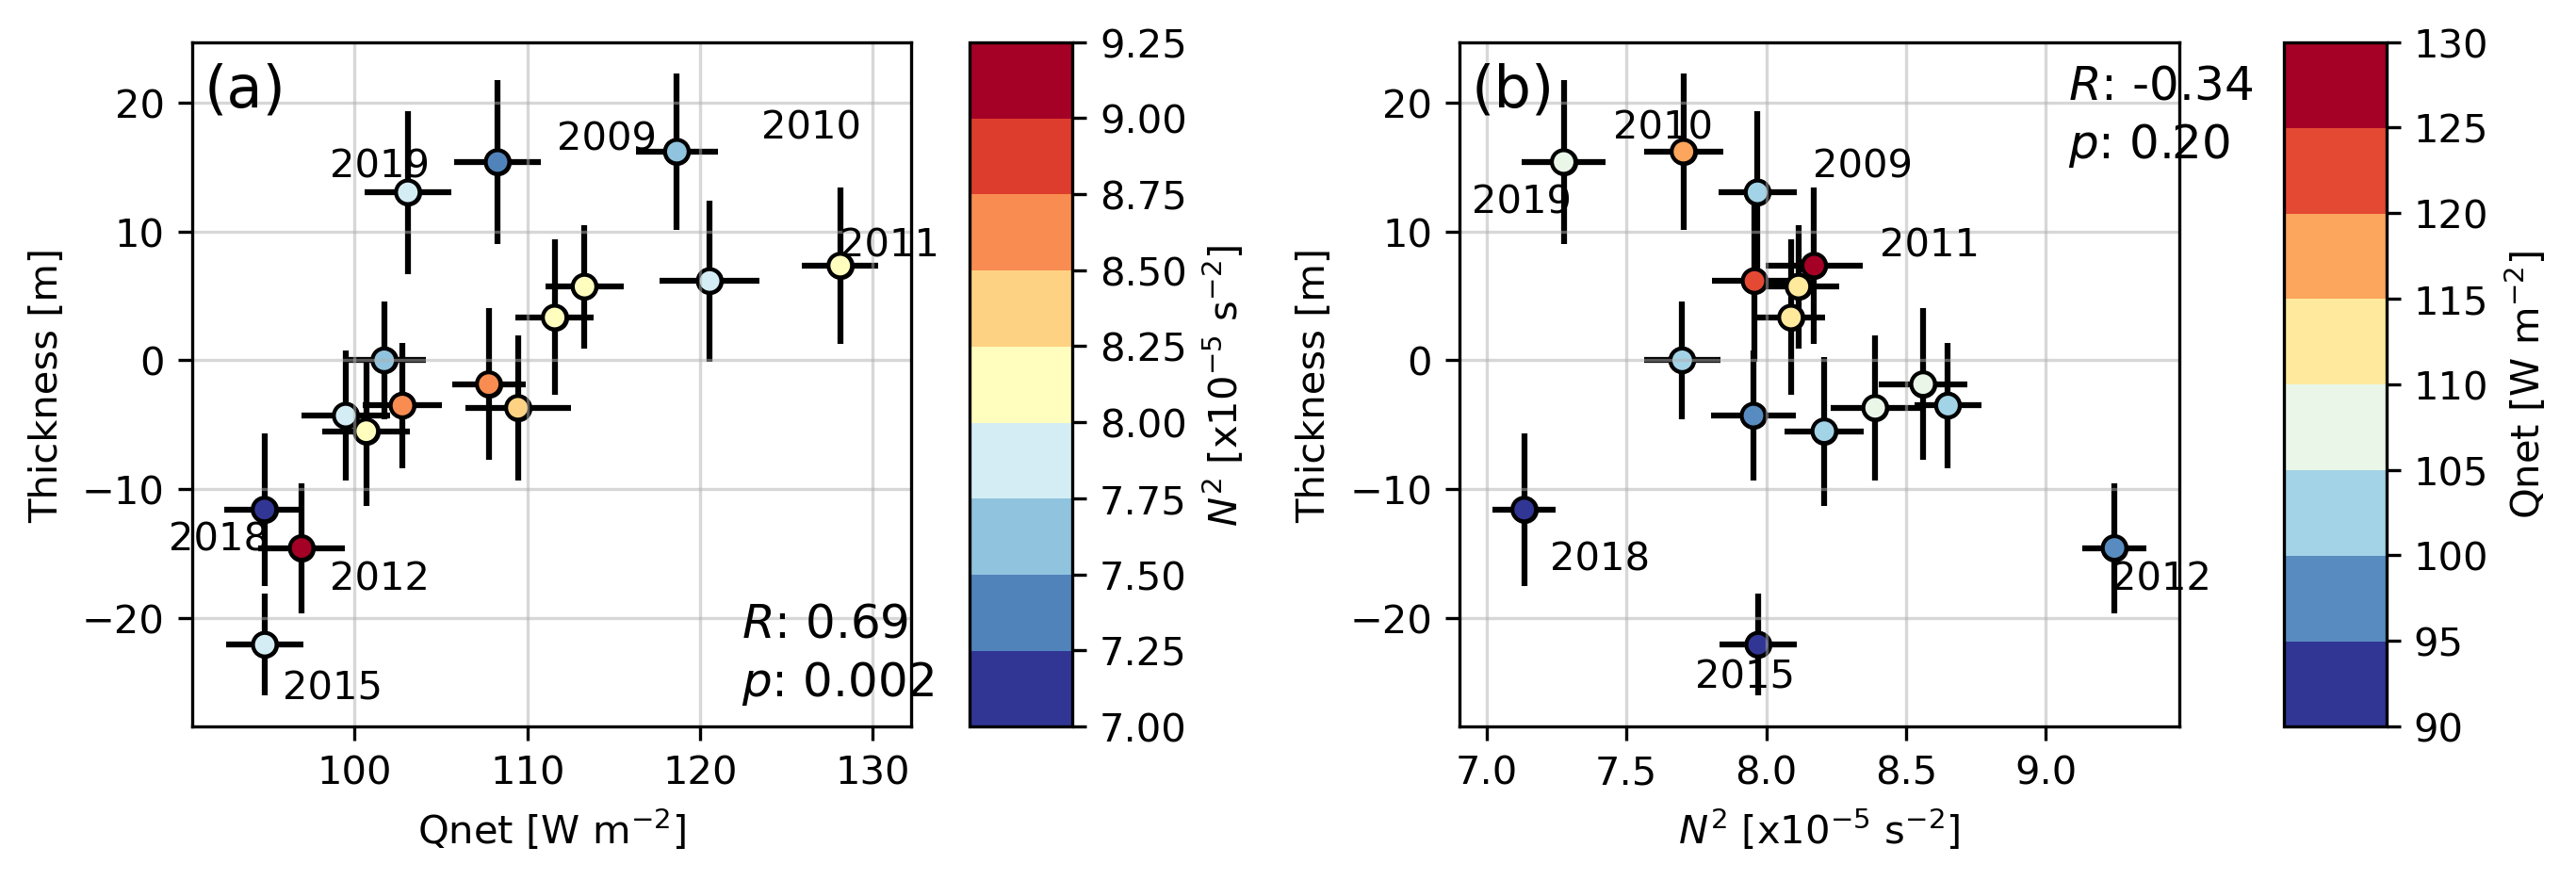

In [16]:
fig, (ax1,ax2) = plt.subplots(dpi=300, figsize=[9,3], ncols=2, constrained_layout=True)
cmapnya='RdYlBu_r'

# plot 1
plot = ds_scat.plot.scatter(x='hf', y='thickness', hue='n2', 
                      levels=np.arange(7,9.2500001,0.25),
                      cmap=cmapnya, ax=ax1,edgecolors='k',
                      cbar_kwargs={'label':'$\itN^{2}$ [x10$^{-5}$ s$^{-2}]$'})


ax1.set_ylabel('Thickness [m]')
ax1.set_xlabel('Qnet [W m$^{-2}$]')
ax1.errorbar(ds_scat.hf, ds_scat.thickness, yerr=ds_scat.thickness_error, 
             xerr=ds_scat.hf_error, fmt="o", zorder=0, c='k')
ax1.grid(alpha=0.5)
ax1.annotate(f'$R$: 0.69', xy=(140,23), xycoords='axes points', size=12)
ax1.annotate(f'$p$: 0.002', xy=(140,8), xycoords='axes points', size=12)
ax1.annotate(f'(a)', xy=(3,158), xycoords='axes points', size=15)

ax1.annotate(f'2015', xy=(23,7), xycoords='axes points', size=10)
ax1.annotate(f'2012', xy=(35,35), xycoords='axes points', size=10)
ax1.annotate(f'2018', xy=(-6,45), xycoords='axes points', size=10)
ax1.annotate(f'2010', xy=(145,150), xycoords='axes points', size=10)
ax1.annotate(f'2019', xy=(35,140), xycoords='axes points', size=10)
ax1.annotate(f'2009', xy=(93,147), xycoords='axes points', size=10)
ax1.annotate(f'2011', xy=(165,120), xycoords='axes points', size=10)

# plot 2
plot = ds_scat.plot.scatter(x='n2', y='thickness', hue='hf', 
                      levels=np.arange(90,131,5), 
                      cmap=cmapnya, ax=ax2,edgecolors='k',
                      cbar_kwargs={'label':'Qnet [W m$^{-2}$]'})
ax2.set_ylabel('Thickness [m]')
ax2.set_xlabel('$\itN^{2}$ [x10$^{-5}$ s$^{-2}]$')
ax2.errorbar(ds_scat.n2, ds_scat.thickness, yerr=ds_scat.thickness_error, xerr=ds_scat.n2_error,
             fmt="o", zorder=0, c='k')
ax2.grid(alpha=0.5)
ax2.annotate(f'(b)', xy=(3,158), xycoords='axes points', size=15)
ax2.annotate(f'$R$: -0.34', xy=(155,160), xycoords='axes points', size=12)
ax2.annotate(f'$p$: 0.20', xy=(155,145), xycoords='axes points', size=12)

ax2.annotate(f'2012', xy=(166,35), xycoords='axes points', size=10)
ax2.annotate(f'2018', xy=(23,40), xycoords='axes points', size=10)
ax2.annotate(f'2015', xy=(60,10), xycoords='axes points', size=10)
ax2.annotate(f'2010', xy=(39,150), xycoords='axes points', size=10)
ax2.annotate(f'2019', xy=(3,131), xycoords='axes points', size=10)
ax2.annotate(f'2009', xy=(90,140), xycoords='axes points', size=10)
ax2.annotate(f'2011', xy=(107,120), xycoords='axes points', size=10)

# Figure 6

In [17]:
hf_anom_decomposition = xr.open_dataset('data/hf_anom_decomposition.nc')
lh_anom_decomposition = xr.open_dataset('data/lf_anom_decomposition.nc')

$$LH' = \rho_a L C_e [\overline{U_a}(q'_s-q'_a) + U'_a(\overline{q_s}-\overline{q_a}) +  U'_a(q'_s-q'_a) - \overline{U'_a(q'_s-q'_a)}] $$ 

In [18]:
sum_all_terms = lh_anom_decomposition.first_term+lh_anom_decomposition.second_term+\
lh_anom_decomposition.third_term-lh_anom_decomposition.fourth_term

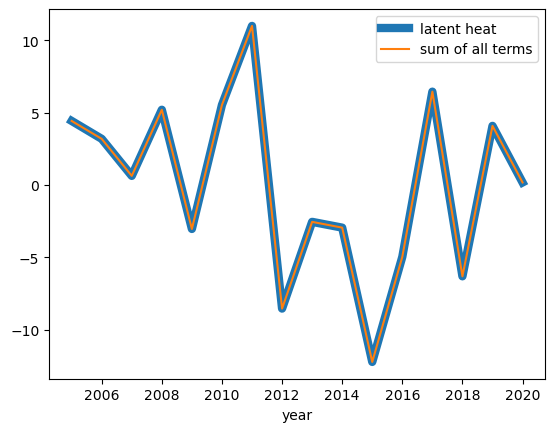

In [19]:
# sum of all terms above equals to the latent heat (lh) variable in hf_decomposition

hf_anom_decomposition.lh.plot(lw=6, label='latent heat')
sum_all_terms.plot(label='sum of all terms')

plt.legend()

Text(0.0, 1.0, '(b) Latent heat anomaly decomposition')

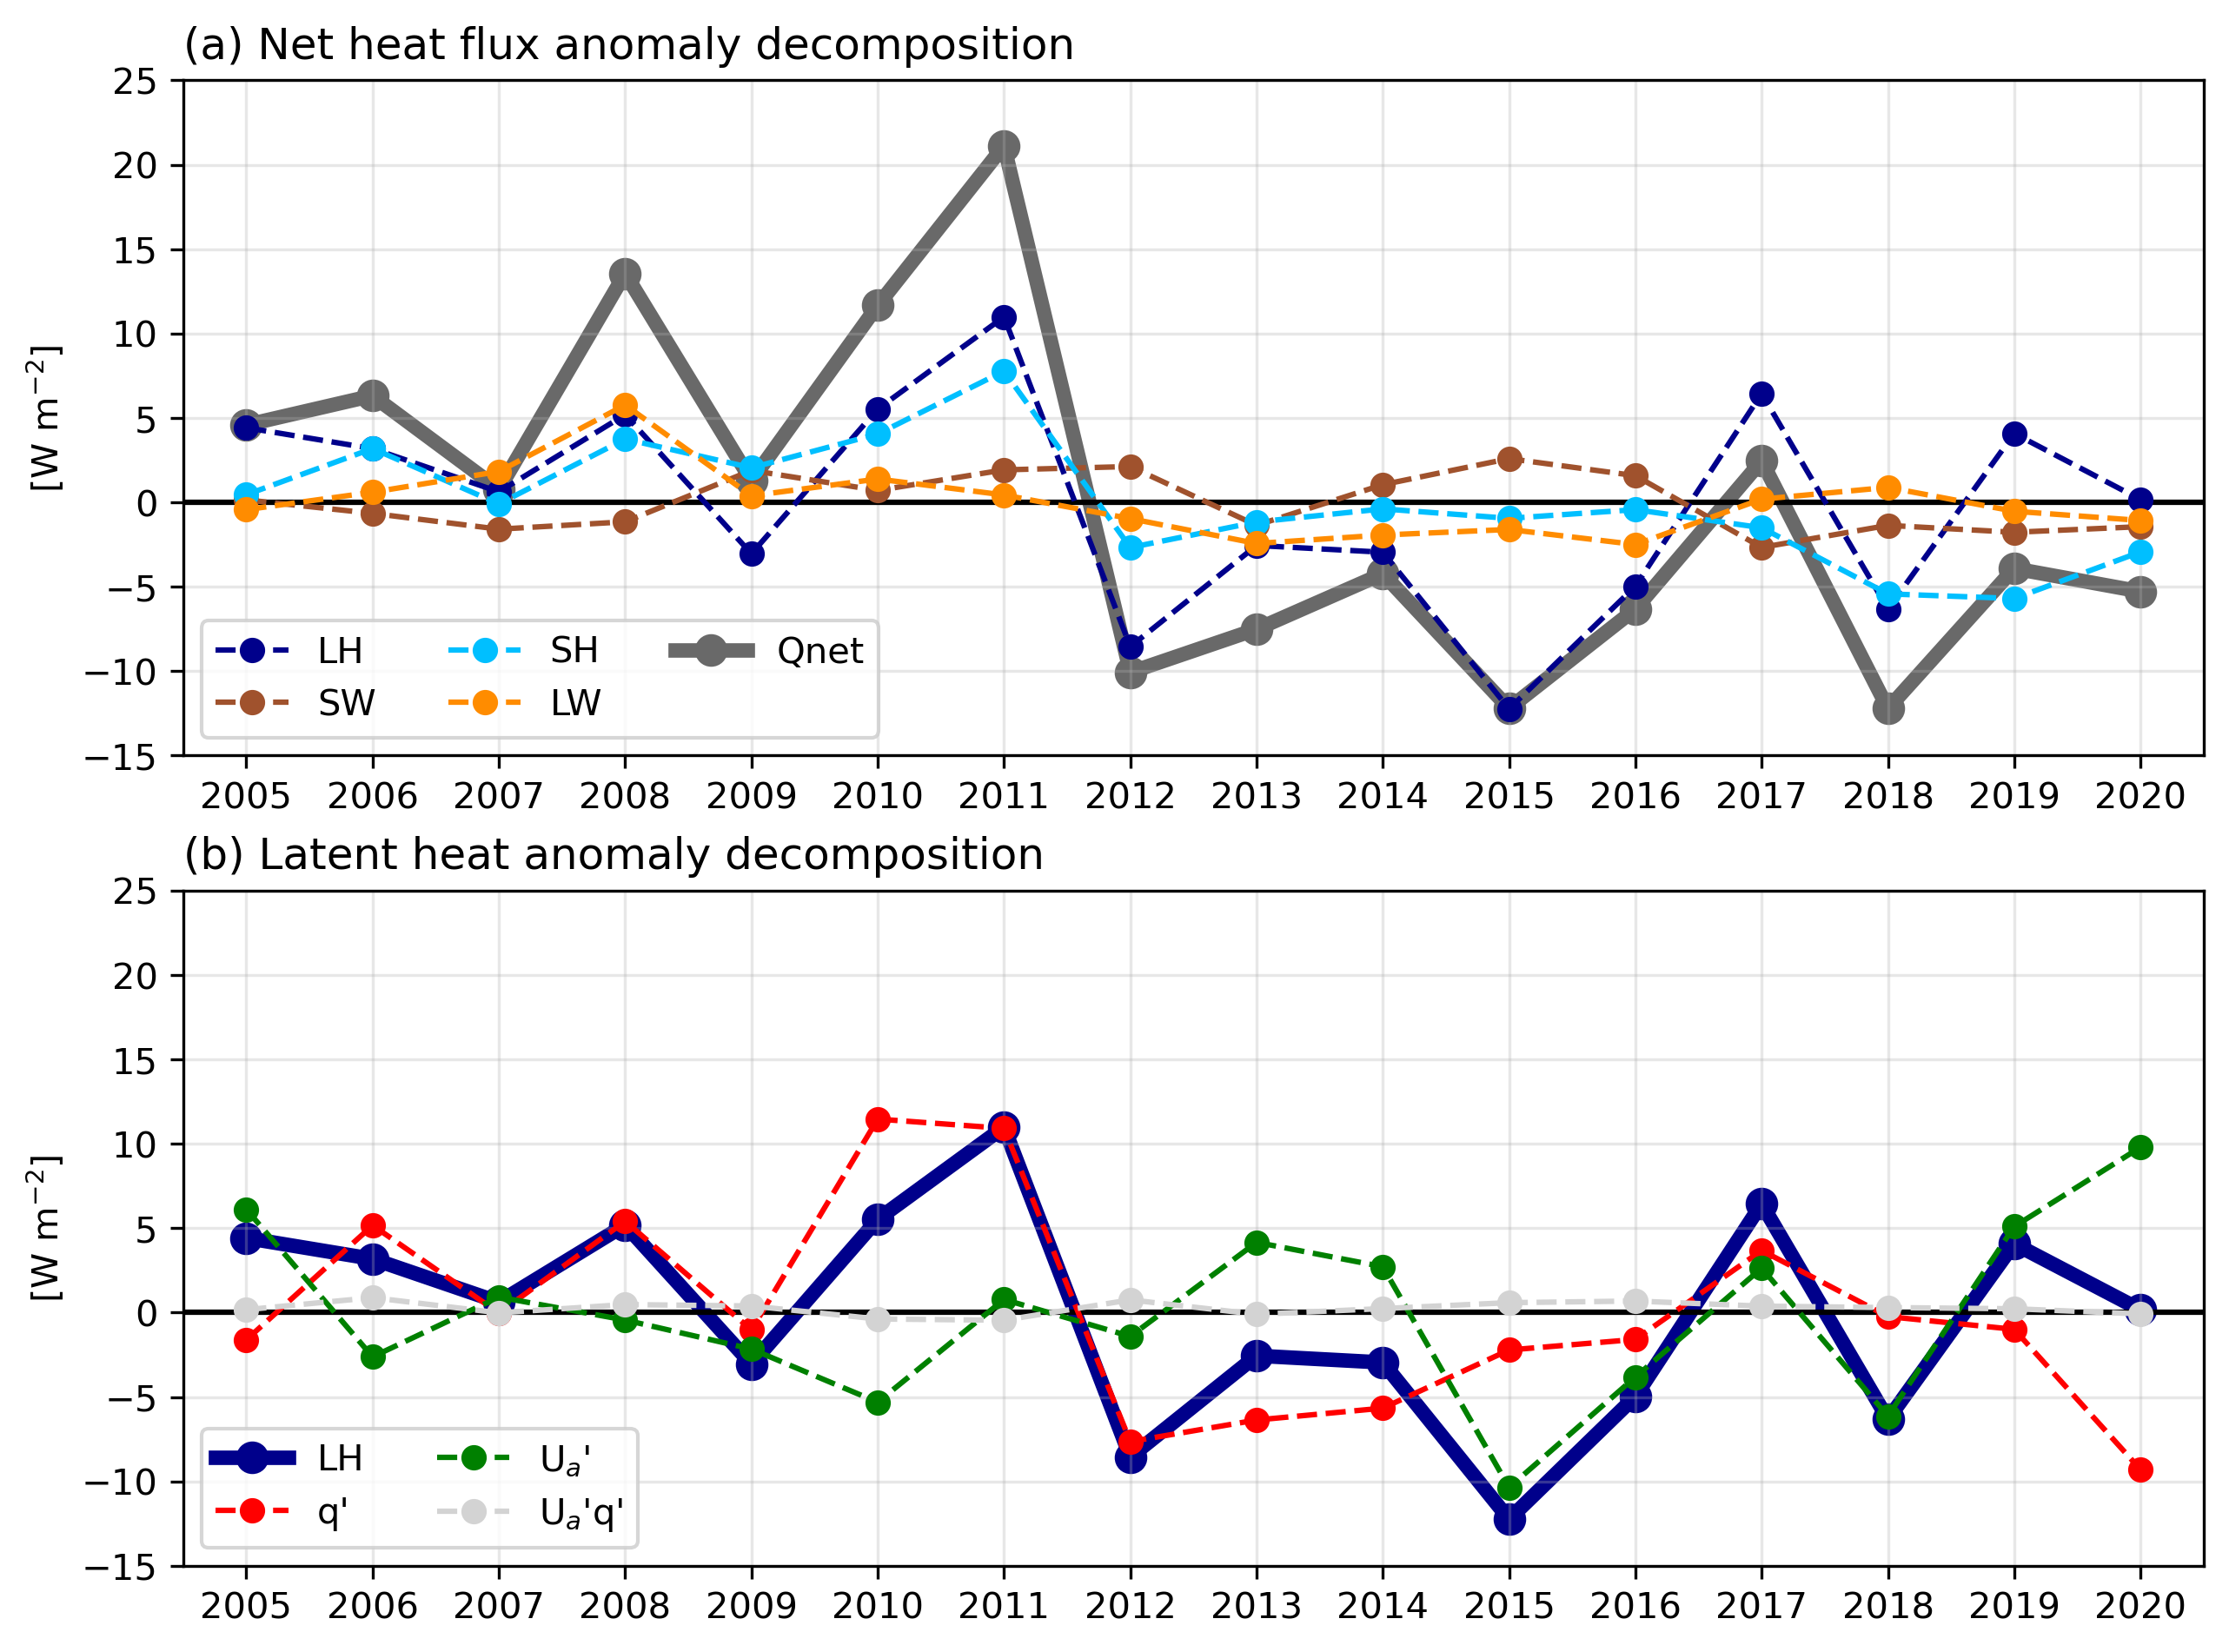

In [20]:
fig, (ax1,ax2) = plt.subplots(dpi=300, figsize=[10,7.4], nrows=2)


lwnya=1.5
hf_anom_decomposition.lh.plot(ax=ax1,marker='o', 
                         label='LH',lw=lwnya, ls='--', c='darkblue')
hf_anom_decomposition.sw.plot(ax=ax1,marker='o', 
                         label='SW',lw=lwnya, ls='--', c='sienna')
hf_anom_decomposition.sh.plot(ax=ax1,marker='o', 
                         label='SH',lw=lwnya, ls='--', c='deepskyblue')
hf_anom_decomposition.lw.plot(ax=ax1,marker='o', 
                         label='LW',lw=lwnya, ls='--', c='darkorange')
hf_anom_decomposition.hf.plot(ax=ax1,marker='o', label='Qnet', 
                         c='dimgray',lw=4, markersize=8, zorder=0)

ax1.hlines(0,2004.5,2020.5, color='k')
ax1.set_xlim(2004.5,2020.5)
ax1.set_xticks(np.arange(2005,2021))
ax1.grid(alpha=0.3)
ax1.set_ylabel('[W m$^{-2}$]')
ax1.set_xlabel('')
ax1.legend(loc='lower left', ncol=3)
ax1.set_ylim(-15,25)
ax1.set_title('(a) Net heat flux anomaly decomposition', loc='left')

# panel 2
lwnya=1.5
sum_all_terms.plot(ax=ax2,marker='o', label="LH", c='darkblue', lw=4, markersize=8, zorder=0)
lh_anom_decomposition.first_term.plot(ax=ax2,marker='o', label="q'",ls='--', c='r',lw=lwnya)
lh_anom_decomposition.second_term.plot(ax=ax2,marker='o', label="U$_a$'",ls='--', c='g',lw=lwnya)
lh_anom_decomposition.third_term.plot(ax=ax2,marker='o', label="U$_a$'q'", ls='--',c='lightgrey',lw=lwnya)
#lh_anom_decomposition.fourth_term.plot(ax=ax2,marker='o', label="fourth term {U'q'}") # not plotted

ax2.hlines(0,2004.5,2020.5, color='k')
ax2.set_xlim(2004.5,2020.5)
ax2.set_xticks(np.arange(2005,2021))
ax2.set_ylim(-15,25)
ax2.set_ylabel('[W m$^{-2}$]')
ax2.set_xlabel('')

#ax.set_xlim(winter_sumnya.year[0],winter_sumnya.year[-1])
ax2.grid(alpha=0.3)
ax2.legend(loc='lower left', ncol=2)
ax2.set_title('(b) Latent heat anomaly decomposition', loc='left')

# Figure 7

In [21]:
thick_years = xr.open_dataset('data/thick_years.nc')
thin_years = xr.open_dataset('data/thin_years.nc')

CPU times: total: 250 ms
Wall time: 273 ms


Text(0.0, 1.0, '$N$$^2$ (0-150m) anomaly during thin years')

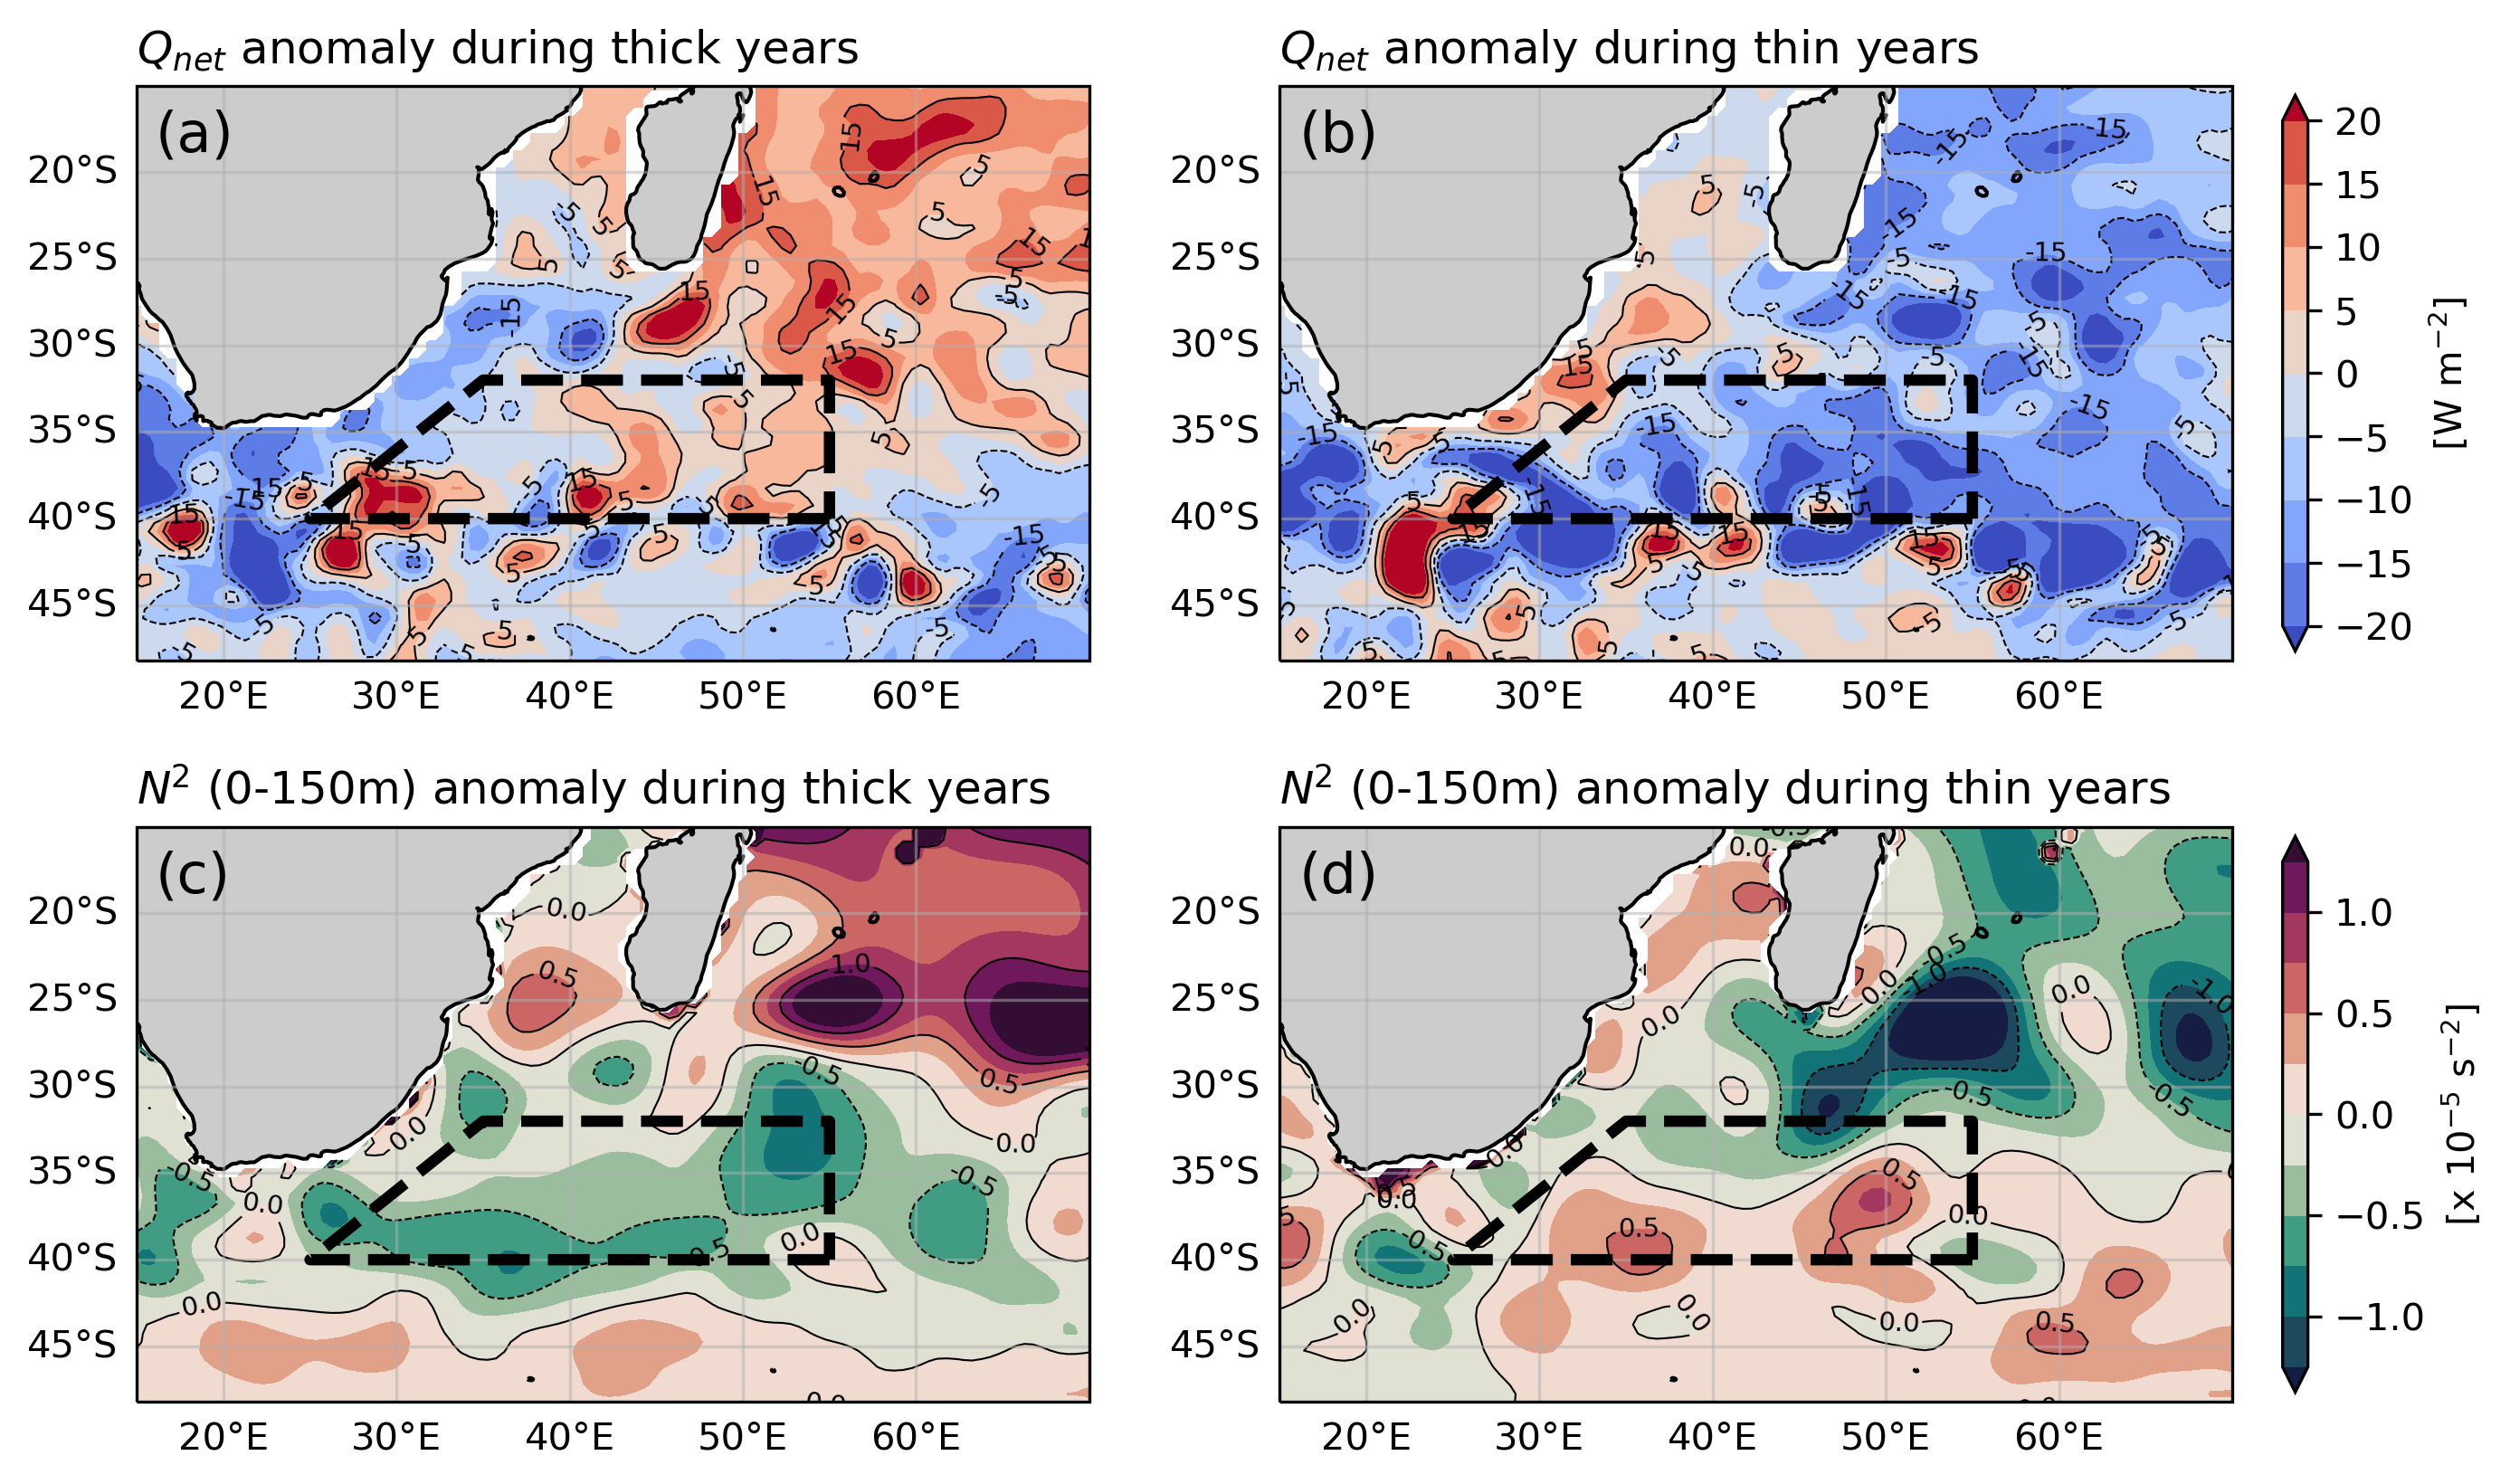

In [25]:
fig, axes = plt.subplots(dpi=300, figsize=[12,6.5],
                         subplot_kw={'projection':ccrs.PlateCarree()},
                        ncols=2,nrows=2)

flat=axes.flat

for ax in flat:
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    ax.add_feature(cfeature.LAND, facecolor='0.8')
    ax.set_extent([15,70,-45,-15])
    
levelsnya=np.arange(-20,20.001,5)
levelsnya_contour_plot=[-15,-5,5,15]
thick_years.hf.plot.contourf(ax=flat[0],levels=levelsnya, add_colorbar=False, extend='both',
                           cmap='coolwarm')
thick_years.hf.plot.contour(ax=flat[0],levels=levelsnya_contour_plot, colors='k',
                          linewidths=0.5).clabel(fmt='%.f', fontsize=7)
img=thin_years.hf.plot.contourf(ax=flat[1],levels=levelsnya, add_colorbar=False, extend='both',
                           cmap='coolwarm')
thin_years.hf.plot.contour(ax=flat[1],levels=levelsnya_contour_plot, colors='k',
                          linewidths=0.5).clabel(fmt='%.f', fontsize=7)

flat[0].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)
flat[1].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)

flat[0].set_title('$Q$$_{net}$ anomaly during thick years', loc='left')
flat[1].set_title('$Q$$_{net}$ anomaly during thin years', loc='left')

cbar=fig.colorbar(img, ax=flat[:2], shrink=0.9, pad=0.02, label='[W m$^{-2}$]')

cmap_dua=cmocean.cm.curl
levelsnya=np.arange(-1.25,1.25001,0.25)
thick_years.n2.plot.contourf(ax=flat[2],levels=levelsnya, add_colorbar=False, extend='both',
                           cmap=cmap_dua)
thick_years.n2.plot.contour(ax=flat[2],levels=np.arange(-1,1.001,0.5), colors='k',
                          linewidths=0.5).clabel(fmt='%.1f', fontsize=7)
            
img=thin_years.n2.plot.contourf(ax=flat[3],levels=levelsnya, add_colorbar=False, extend='both',
                           cmap=cmap_dua)
thin_years.n2.plot.contour(ax=flat[3],levels=np.arange(-1,1.001,0.5), colors='k',
                          linewidths=0.5).clabel(fmt='%.1f', fontsize=7)

cbar=fig.colorbar(img, ax=flat[2:4], shrink=0.9, pad=0.02, label='[x 10$^{-5}$ s$^{-2}$]')

flat[2].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)
flat[3].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)

flat[0].annotate('(a)', [5,135], xycoords='axes points', size=15)
flat[1].annotate('(b)', [5,135], xycoords='axes points', size=15)
flat[2].annotate('(c)', [5,135], xycoords='axes points', size=15)
flat[3].annotate('(d)', [5,135], xycoords='axes points', size=15)

flat[2].set_title('$N$$^2$ (0-150m) anomaly during thick years', loc='left')
flat[3].set_title('$N$$^2$ (0-150m) anomaly during thin years', loc='left');

# Figure 8

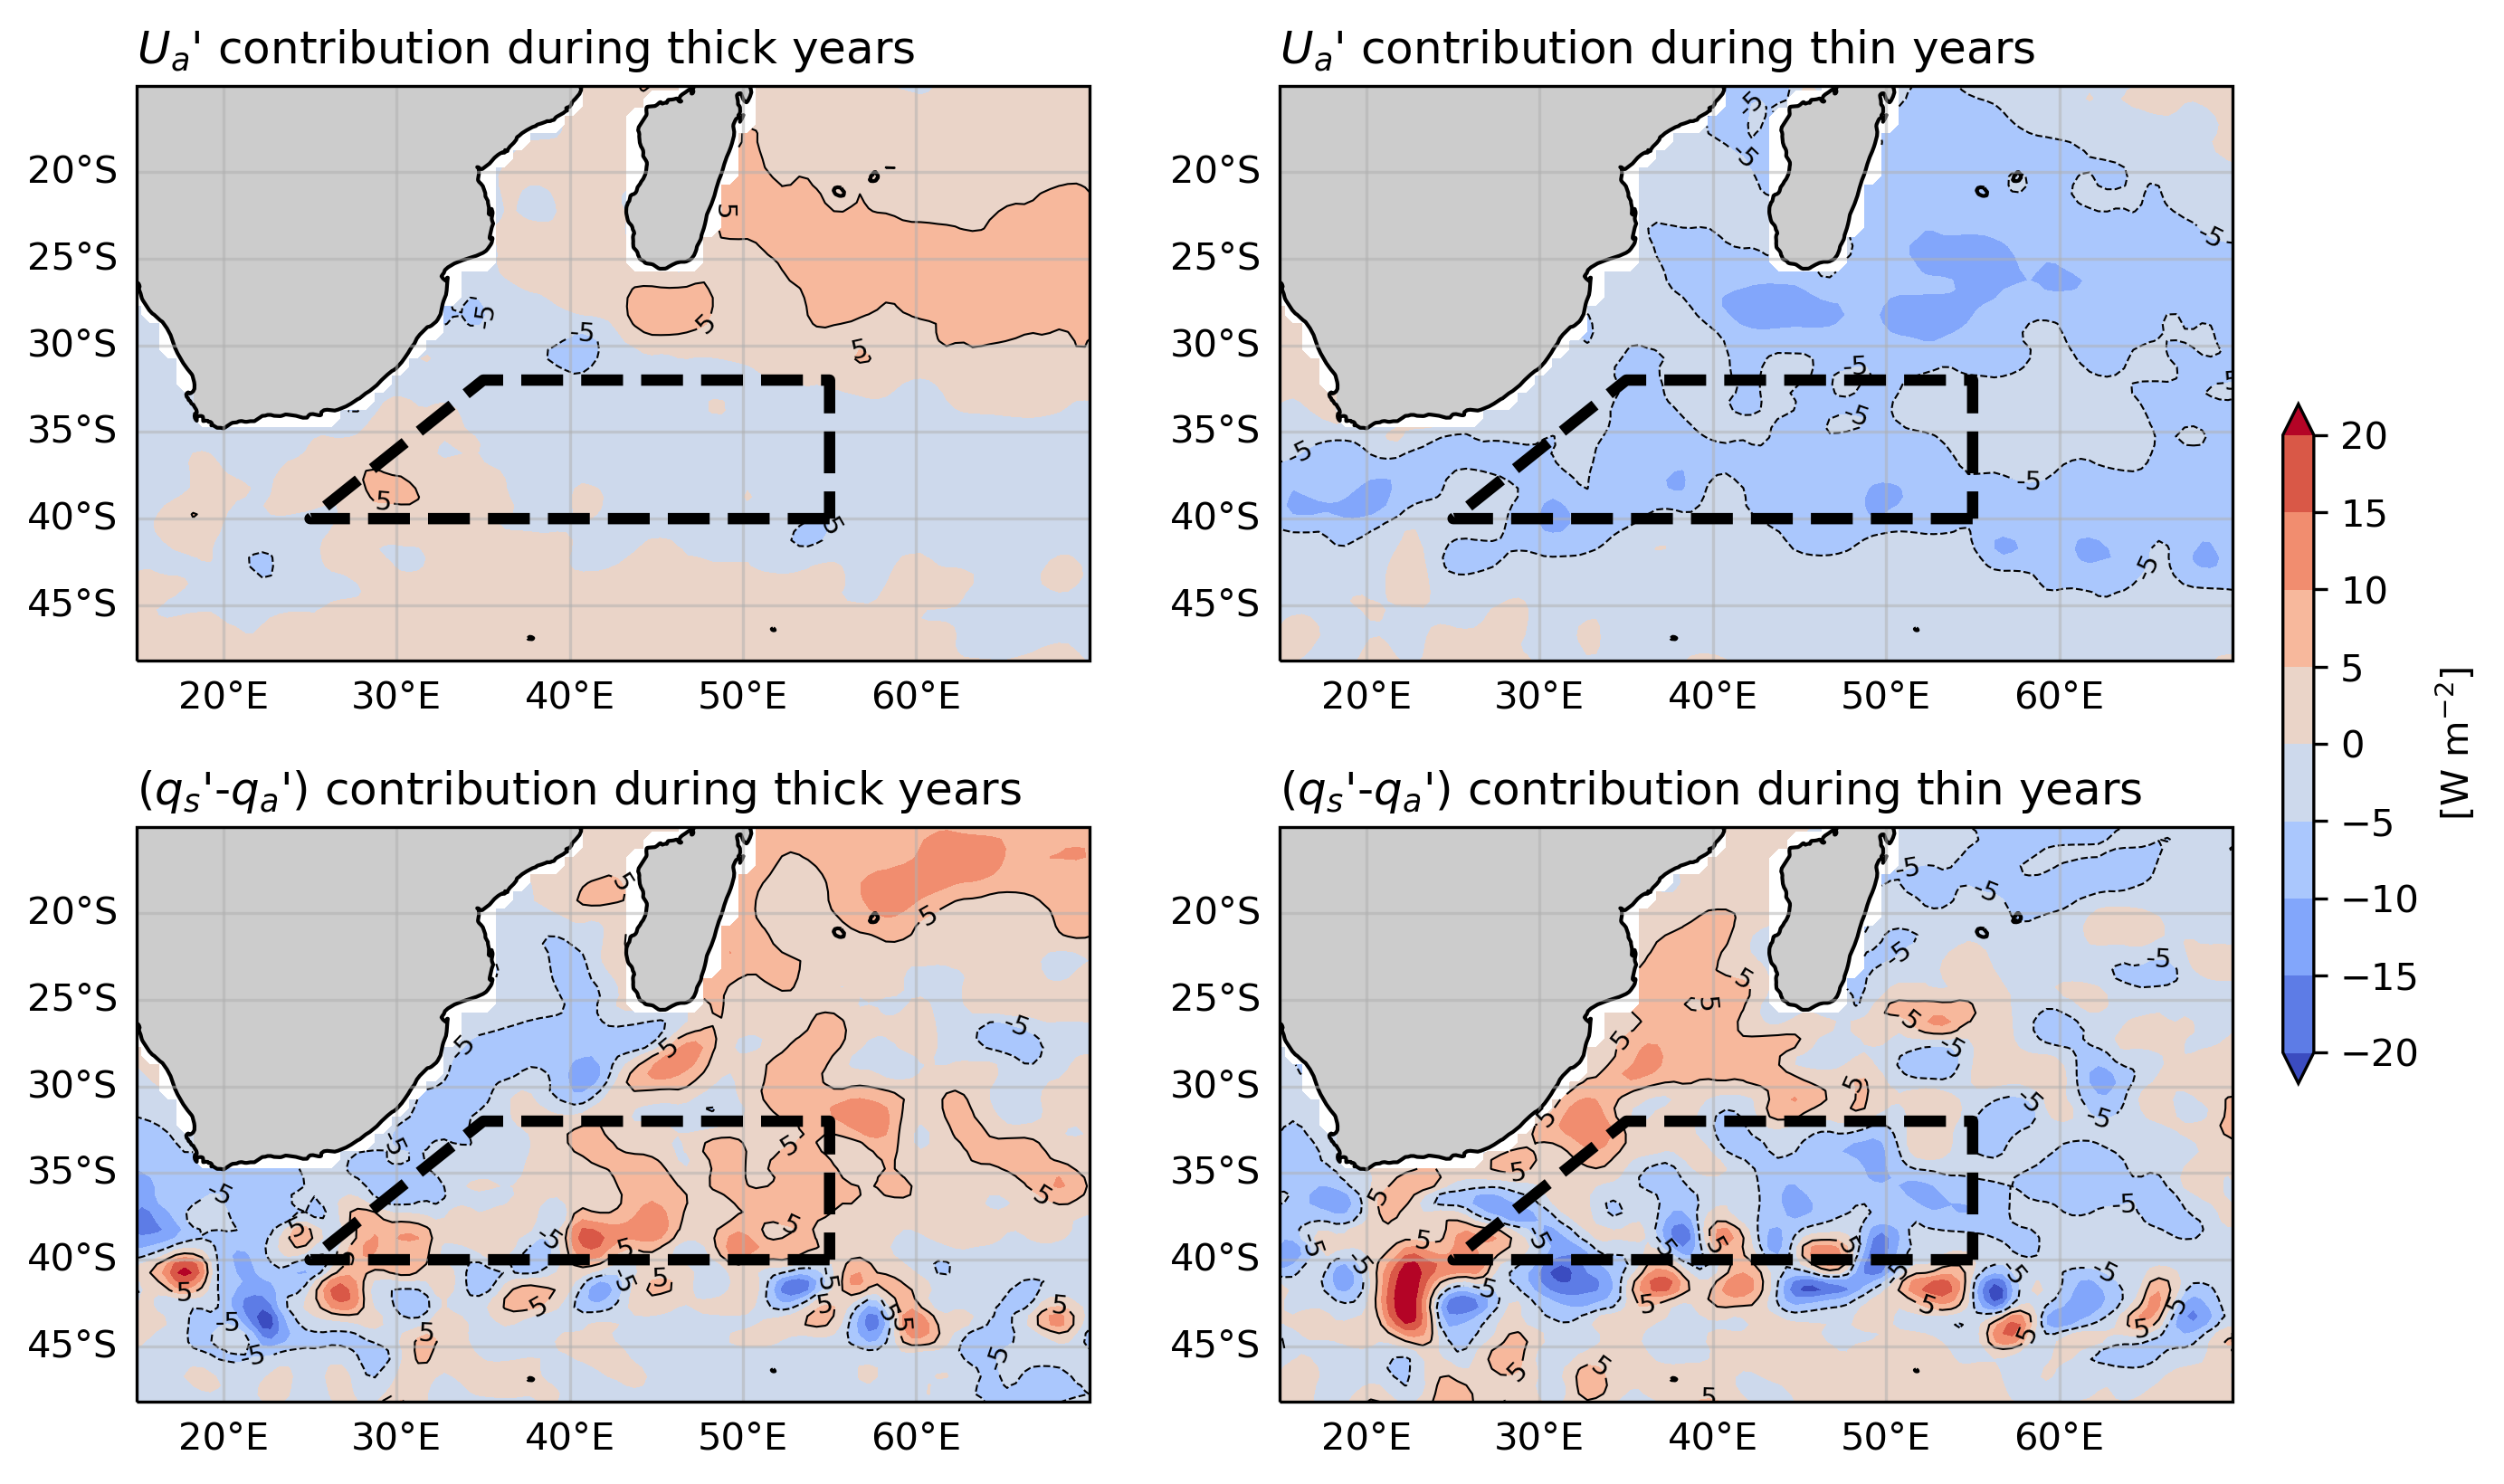

In [23]:
fig, axes = plt.subplots(dpi=300, figsize=[12,6.5],
                         subplot_kw={'projection':ccrs.PlateCarree()},
                        ncols=2,nrows=2)

flat=axes.flat

for ax in flat:
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    ax.add_feature(cfeature.LAND, facecolor='0.8')
    ax.set_extent([15,70,-45,-15])
    
cmapnya='coolwarm'
levelsnya=np.arange(-20,20.001,5)
levelsnya_contour=[-5,5]

(thick_years.second_term).plot.contourf(ax=flat[0],levels=levelsnya, add_colorbar=False, extend='both', cmap=cmapnya)
(thick_years.second_term).plot.contour(ax=flat[0],levels=levelsnya_contour, colors='k',
                          linewidths=0.5).clabel(fmt='%.f', fontsize=7)
img=(thin_years.second_term).plot.contourf(ax=flat[1],levels=levelsnya, add_colorbar=False, extend='both', cmap=cmapnya)
(thin_years.second_term).plot.contour(ax=flat[1],levels=levelsnya_contour, colors='k',
                          linewidths=0.5).clabel(fmt='%.f', fontsize=7)

cbar=fig.colorbar(img, ax=axes, shrink=0.5, pad=0.02, label='[W m$^{-2}$]')

flat[0].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)
flat[1].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)

flat[0].set_title("$U$$_a$' contribution during thick years", loc='left')
flat[1].set_title("$U$$_a$' contribution during thin years", loc='left')

(thick_years.first_term).plot.contourf(ax=flat[2],levels=levelsnya, add_colorbar=False, extend='both', cmap=cmapnya)
(thick_years.first_term).plot.contour(ax=flat[2],levels=levelsnya_contour, colors='k',
                          linewidths=0.5).clabel(fmt='%.f', fontsize=7)
img=(thin_years.first_term).plot.contourf(ax=flat[3],levels=levelsnya, add_colorbar=False, extend='both', cmap=cmapnya)
(thin_years.first_term).plot.contour(ax=flat[3],levels=levelsnya_contour, colors='k',
                          linewidths=0.5).clabel(fmt='%.f', fontsize=7)

flat[2].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)
flat[3].plot([55,25,35,55,55], [-40,-40,-32,-32,-40], color='k',
         linestyle='--', linewidth=3)

flat[2].set_title("($q$$_s$'-$q$$_a$') contribution during thick years", loc='left')
flat[3].set_title("($q$$_s$'-$q$$_a$') contribution during thin years", loc='left');